# <center><u><font color='red'>Projet 7 : Implémentez un modèle de scoring</font></u><br> <br><font color='red'>Partie 2 : Modélisation </font></center> 

# <font color='green'>Réflexion + fonctions</font>

Dans ce notebook, je vais tout d'abord mettre en place un modèle de régression comme base puis une comparaison d'algorithmes de classification, déterminer celui qui sera le plus adapté à notre problématique (en prenant en compte le fait qu'il y ait un déséquilibre de TARGET) tout en montrant l'importance des features puis séléctionner les features pertinentes pour les visualisations sur notre dashboard.

L'objectif de ce projet est d'utiliser les données historiques des demandes de prêt pour prédire si un demandeur sera en mesure ou non de rembourser un prêt. "Il s'agit d'une classification supervisée".

apprentissage superviser : Les étiquettes sont incluses dans les données d'apprentissage et l'objectif est de former un modèle pour apprendre à prédire les étiquettes à partir des caractéristiques.
Classification : L'étiquette est une variable binaire, 0 (remboursera le prêt à temps), 1 (aura des difficultés à rembourser le prêt)".




Il y a beaucoup plus de prêts remboursés à temps que de prêts non remboursés. 

Une fois que nous entrons dans des modèles d'apprentissage automatique plus sophistiqués, nous pouvons pondérer les classes par leur représentation dans les données pour refléter ce déséquilibre.


## <font color='blue'>Reflexion</font>

**Métrique adaptée au problème de la banque:**

La banque cherche les personnes ne pouvant rembourser un prêt et lorsque ce but est atteint l'évènement est positif. Le défaut de remboursement sera donc considéré comme l'évènement positif. posifit = 1.

>TP (True Positives) : les cas où la prédiction est positive, et où la valeur réelle est effectivement positive.  <font color='red'>LE PRET N'EST PAS ACCORDE ET LE CLIENT NE PEUT PAS REMBOURSER LE PRET</font>

>TN (True Negatives) : les cas où la prédiction est négative, et où la valeur réelle est effectivement négative. <font color='red'>LE PRET EST ACCORDE ET LE CLIENT PEUT REMBOURSER LE PRET</font> 

>FP (False Positive) : les cas où la prédiction est positive, mais où la valeur réelle est négative.  <font color='red'>LE PRET N'EST PAS ACCORDE MAIS LE CLIENT PEUT REMBOURSE LE PRET</font>

>FN (False Negative) : les cas où la prédiction est négative, mais où la valeur réelle est positive. <font color='red'>LE PRET EST ACCORDE MAIS LE CLIENT NE PEUT PAS REMBOURSER LE PRET</font> 

Une banque cherche à ne pas accorder de prêt à des clients qui ne peuvent pas le rembourser (TP à maximiser). La banque ne veut pas accorder un prêt à un client qui ne peut pas le rembourser (FN à minimiser). La banque fait un déficit si elle n'accorde pas de prêt à des clients qui peuvent rembourser le prêt.


**Les algorithmes sont comparés par les métriques suivantes :** 
* Accuracy_score : le ratio entre le nombre total de prédictions correctes et le nombre total de prédictions (c'est la justesse de la prédiction).
* Precision : Le ratio entre les vrais positifs et tous les positifs
* Recall : La moyenne harmonique de Precision et du Recall. Un bon score F1 indique une bonne Precision et une bonne valeur de Recall
* F1_score : Synthèse de Precision et Recall
* AUC : Aire sous la courbe ROC = mesure de la capacité d'un classifieur à distinguer les classes. Plus l'AUC est élevée, plus la performance du modèle à distinguer les classes positives et négatives est bonne.
* Matrice de confusion
* ROC Curve



maximiser : AUC, TP, F1, recall


minimiser : FN


**Définition d'une métrique "métier"**

Il faut créer une métrique pertinente concernant notre problématique pour comparer nos algorithmes. Une société de crédit cherche à "maximiser" ses gains. 
* Accorder un crédit à quelqu'un ne pouvant pas le rembourser par la suite (FN) est synonyme de perte pour l'entreprise
* Accorder un crédit à un client qui le rembousera par la suite (TN) est un gain.
* Ne pas accorder le prêt et que le client ne peut pas rembourser (TP) n'est ni une perte, ni un gain. 
* Ne pas accorder le prêt mais que le client pouvait rembourser (FP) est une perte de client donc d'argent.

On va donc créer un score en pondérant les différents cas possibles qui sera normalisé entre 0 et 1 par une normalisation min-max feature scalling avec : 

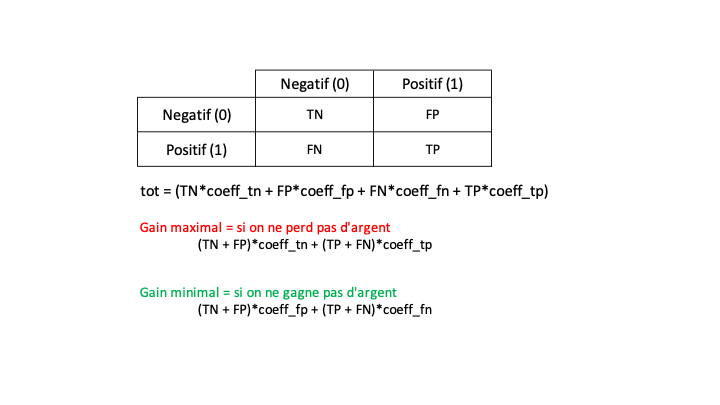

puis gain = (tot-gain_min) / (gain_max-gain_min)


Exemple de coefficients possibles en respectant la métrique métier :
* FN ==> perte d'argent pour la banque ==> -100 
* TP ==> refus de prêt ==> 0
* TN ==> prêt accordé, gain d'argent pour la banque ==> +10
* FP ==> client perdu, perte d'argent pour la banque ==> -1

La courbe ROC (Reciever Operating Characteristic) représente le taux de vrais positifs par rapport au taux de faux positifs.

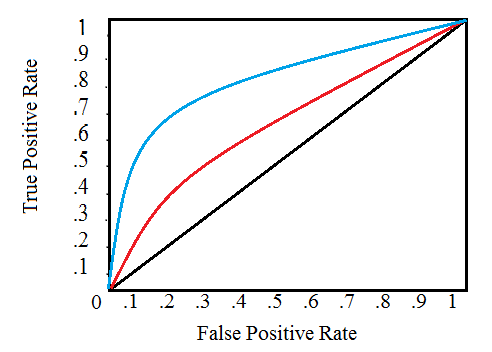

Une seule ligne sur le graphique indique la courbe pour un seul modèle, et le déplacement le long d'une ligne indique le changement du seuil utilisé pour classer une instance positive. Le seuil commence à 0 dans la partie supérieure droite et va jusqu'à 1 dans la partie inférieure gauche. Une courbe qui se trouve à gauche et au-dessus d'une autre courbe indique un meilleur modèle. Par exemple, le modèle bleu est meilleur que le modèle rouge, qui est meilleur que la ligne diagonale noire qui indique un modèle de supposition aléatoire naïve.

AUC :  Il s'agit simplement de l'aire sous la courbe ROC. (C'est l'intégrale de la courbe.) Cette métrique est comprise entre 0 et 1, un meilleur modèle obtenant un score plus élevé. Un modèle qui se contente de deviner au hasard aura une AUC ROC de 0,5. l'AUC est une mesure de la probabilité pour que le modèle classe un exemple positif aléatoire au-dessus d'un exemple négatif aléatoire. 




## <font color='blue'>fonctions</font>

In [1]:
def classification(best_param, X_train, y_train, X_test, y_test, algo_name, file_name=None):
    print(colored("Exécution \n ", 'red'))

    start_time = time.time()
    model = best_param.fit(X_train, y_train)
    execution_time = (time.time() - start_time)

    if file_name is None:
        pass
    else :
        # save the model to disk
        filename = file_name
        pickle.dump(model, open(filename, 'wb'))

    start_time = time.time()
    prediction = best_param.predict(X_test)
    prediction_time = (time.time() - start_time)

    #prediction de probabilité d'appartenance à 0 et 1
    probability = best_param.predict_proba(X_test)
    probability_positive = probability[:, 1]


    resume_prediction_class = pd.DataFrame(
        {'cat_reel': y_test, 'cat_predit': prediction}).reset_index()



    probability_positive_class = pd.DataFrame(
        {'SK_ID_CURR': X_test.index, 'positive_probability': probability_positive})
    
    print(probability_positive_class)
    

    print(colored("Qualité de la classification \n \n ", 'red'))
    accuracy = accuracy_score(y_test, prediction)
    print(colored('L\'accuracy score est de {} pour la méthode {}.\n \n '.format(
        accuracy, algo_name), 'blue'))

    precision = precision_score(y_test, prediction, average='binary')  #binary car ici 0 ou 1 si plusieurs label c'est weighted
    print(colored('Le score de précision est de {} pour la méthode {}.\n \n '.format(
        precision, algo_name), 'blue'))

    recall = recall_score(y_test, prediction, average='binary')
    print(colored('Le score recall est de {} pour la méthode {}.\n \n '.format(
        recall, algo_name), 'blue'))

    f1 = f1_score(y_test, prediction, average='binary')
    print(colored('Le score f1 est de {} pour la méthode {}.\n \n '.format(
        f1, algo_name), 'blue'))
    
    AUC = roc_auc_score(y_test, probability[:,1])       #proba de na pas rembourser prêt donc d'être 1
    print(colored('Le score AUC est de {} pour la méthode {}.\n \n '.format(
        AUC, algo_name), 'blue'))
    
    return model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class

In [2]:
def matrix_TN_FN(y_test, y_prediction):
    
    """
    Cette fonction retourne une matrice de confusion.
    """
    
    # Création de la matrice de confusion.
    df_matrice_confusion = pd.DataFrame(columns=['Predicted Negative (0)','Predicted Positive (1)'], 
                                        index=['Real Negative (0)','Real Positive (1)'])

    # DataFrame de comparaison.
    df_pred_compare = pd.concat([pd.Series(y_test.reset_index(drop=True)), pd.Series(y_prediction)], axis=1)
    df_pred_compare.columns = ['Real category', 'Prediction']
    
    # Masque suivant les tp,tn, fp...
    mask_real_pos = (df_pred_compare['Real category']==1)
    mask_pred_pos = (df_pred_compare['Prediction']==1)

    mask_real_neg = (df_pred_compare['Real category']==0)
    mask_pred_neg = (df_pred_compare['Prediction']==0)
    
    # Négatif.
    true_negative = df_pred_compare[mask_real_neg & mask_pred_neg].shape[0]
    false_negative = df_pred_compare[mask_real_pos & mask_pred_neg].shape[0]

    # Positif.
    false_positive = df_pred_compare[mask_real_neg & mask_pred_pos].shape[0]
    true_positive = df_pred_compare[mask_real_pos & mask_pred_pos].shape[0]

    # Remplissage de la matrice.
    df_matrice_confusion['Predicted Negative (0)'] = ["{} (TN)".format(true_negative), "{} (FN)".format(false_negative)]
    df_matrice_confusion['Predicted Positive (1)'] = ["{} (FP)".format(false_positive), "{} (TP)".format(true_positive)]

    
    return df_matrice_confusion

In [3]:
def cf_matrix_roc_auc(y_true, y_pred, y_pred_proba, size):
    '''This function will make a pretty plot of 
  an sklearn Confusion Matrix using a Seaborn heatmap visualization + ROC Curve.'''
    fig = plt.figure(figsize=size)
  
    #plt.subplot(221)
    ax1 = fig.add_subplot(221)
    ax1.title.set_text('Confusion Matrix')
    cf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
    group_names = ['True Neg (TN)', 'False Pos (FP)', 'False Neg (FN)', 'True Pos (TP)']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='RdPu')
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)


    #plt.subplot(222)
    ax2 = fig.add_subplot(222)
    ax2.title.set_text('ROC Curve')
    fpr,tpr,_ = roc_curve(y_true, y_pred_proba[:,1])    #pour la courbe ROC utilisation de la probabiilité d'être 1
    plt.plot(fpr, tpr, color='pink', linewidth=5, label='AUC = %0.4f' %roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    plt.show()
 
    print('True negative = ', tn)
    print('False positive = ', fp)
    print('False negative = ', fn)
    print('True positive = ', tp)

    return tn, fp, fn, tp

In [4]:
def score_banq(tn, fp, fn, tp, coeff_tn, coeff_fp, coeff_fn, coeff_tp):

    total = (coeff_tn*tn + coeff_fp*fp + coeff_fn*fn + coeff_tp*tp)

    #calcul du gain maximal que peut avoir la banque quand il n'y a pas de perte d'argent. C'est à dire que le modèle ne détecte que TN et les TP.
    max_gain = (tn + fp)*coeff_tn + (tp + fn)*coeff_tp

    #calcul du gain minimal (perte) que peut avoir la banque quand il n'y a pas de gain d'argent. C'est à dire que le modèle ne détecte que FN et les FP.
    min_gain = (tn + fp)*coeff_fp + (tp + fn)*coeff_fn

    #normalisation min-max feature scalling : score= (tot-min)/(max-min) https://en.wikipedia.org/wiki/Normalization_(statistics) 
    score = (total - min_gain)/(max_gain - min_gain)

    return score

# <font color='green'>Setting up the work environment</font>

## <font color='blue'>Library</font>

In [5]:
# General
# File system management
import os

# Visualisation
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns

import math
from termcolor import colored
import time

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 

#import shap

%matplotlib inline

## <font color='blue'>Parameters</font>

In [6]:
# Format & option
sns.set(rc={"figure.figsize": (16, 9)})
pd.options.display.max_columns = 150

# Style use
sns.set_style("darkgrid")
plt.style.use("ggplot")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
%matplotlib inline

# Suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [7]:
#!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2021-12-31 15:18:33 +01:00)


# <font color='green'>Importing data</font>

In [8]:
default_dir = (
    "/Users/fayca/P7/"
)

df_train = pd.read_csv(r'df_train_imputed.csv', index_col='SK_ID_CURR', encoding ='utf-8')
import re
df_train = df_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

time: 4.05 s (started: 2021-12-31 15:18:39 +01:00)


In [9]:
df_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,...,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business_Entity_Type_1,ORGANIZATION_TYPE_Business_Entity_Type_2,ORGANIZATION_TYPE_Business_Entity_Type_3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry_type_1,ORGANIZATION_TYPE_Industry_type_10,ORGANIZATION_TYPE_Industry_type_11,ORGANIZATION_TYPE_Industry_type_12,ORGANIZATION_TYPE_Industry_type_13,ORGANIZATION_TYPE_Industry_type_2,ORGANIZATION_TYPE_Industry_type_3,ORGANIZATION_TYPE_Industry_type_4,ORGANIZATION_TYPE_Industry_type_5,ORGANIZATION_TYPE_Industry_type_6,ORGANIZATION_TYPE_Industry_type_7,ORGANIZATION_TYPE_Industry_type_9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal_Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security_Ministries,ORGANIZATION_TYPE_Selfemployed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade_type_1,ORGANIZATION_TYPE_Trade_type_2,ORGANIZATION_TYPE_Trade_type_3,ORGANIZATION_TYPE_Trade_type_4,ORGANIZATION_TYPE_Trade_type_5,ORGANIZATION_TYPE_Trade_type_6,ORGANIZATION_TYPE_Trade_type_7,ORGANIZATION_TYPE_Transport_type_1,ORGANIZATION_TYPE_Transport_type_2,ORGANIZATION_TYPE_Transport_type_3,ORGANIZATION_TYPE_Transport_type_4,ORGANIZATION_TYPE_University,HOUSETYPE_MODE_block_of_flats,HOUSETYPE_MODE_specific_housing,HOUSETYPE_MODE_terraced_house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,WALLSMATERIAL_MODE_Stone_brick,WALLSMATERIAL_MODE_Wooden,MOST_CREDIT_TYPE_Another_type_of_loan,MOST_CREDIT_TYPE_Car_loan,MOST_CREDIT_TYPE_Consumer_credit,MOST_CREDIT_TYPE_Credit_card,MOST_CREDIT_TYPE_Loan_for_business_development,MOST_CREDIT_TYPE_Loan_for_working_capital_replenishment,MOST_CREDIT_TYPE_Microloan,MOST_CREDIT_TYPE_Mortgage,MOST_CREDIT_TYPE_Unknown_type_of_loan,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0,1,0,1,0,-0.573222,0.069058,-0.513860,-0.222911,-0.544493,-0.226831,-1.521797,0.784979,0.435145,0.592401,0.002542,0.458151,-0.46321,0.047807,1.490005,-0.267116,-1.234433,0.032789,0.100683,-0.691

time: 359 ms (started: 2021-12-31 15:18:47 +01:00)


# <font color='green'>Train/test separation</font>

In [10]:
X = df_train.copy()
y = X['TARGET']
X = X.drop(['TARGET'], axis=1)
X = X[X.columns]

# Split en training/testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2  # 20% des données dans le jeu de test = 20% de short data
                                                    , random_state=42)

time: 531 ms (started: 2021-12-31 15:18:52 +01:00)


In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(123845, 210) (30962, 210) (123845,) (30962,)
time: 0 ns (started: 2021-12-31 15:18:58 +01:00)


# <font color='green'>Cross validation</font>

In [12]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {"C":[-0.001, -0.01, -0.1, 1, 0.1, 0.01, 0.001, 5, 10, 15, 50, 100]} 
        

# Choisir un score à optimiser
score = 'roc_auc'


# define the model/ estimator
model = LogisticRegression(random_state=42)

# define the grid search
lr= GridSearchCV(model, param_grid, scoring=score, cv=4, n_jobs=-1, verbose=2)  #cv : number of cross validation RandomizedSearchCV

# Optimiser ce régresseur sur le jeu d'entraînement
lr.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement (best parameters) :")
best_params = lr.best_params_
print(best_params)
print(' ')
print("Meilleur(s) score sur le jeu d'entraînement (roc_auc):")
print(lr.best_score_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement (best parameters) :
{'C': 0.1}
 
Meilleur(s) score sur le jeu d'entraînement (roc_auc):
0.7373945953596174
time: 1min 26s (started: 2021-12-30 20:56:59 +01:00)


In [ ]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {
        'n_estimators' : np.arange(500, 1500, 100),
        'learning_rate' : [1, 0.1, 0.01, 0.001]
        }

# Choisir un score à optimiser
score = 'roc_auc'


# define the model/ estimator
model = LGBMClassifier(objective='binary', random_state=42)

# define the grid search
lgbm= GridSearchCV(model, param_grid, scoring=score, cv=4, n_jobs=-1, verbose=2)  #cv : number of cross validation RandomizedSearchCV

# Optimiser ce régresseur sur le jeu d'entraînement
lgbm.fit(X_train, y_train, eval_metric='auc')

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement (best parameters) :")
best_params = lgbm.best_params_
print(best_params)
print(' ')
print("Meilleur(s) score sur le jeu d'entraînement (roc_auc):")
print(lgbm.best_score_)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


# <font color='green'>Baseline</font>

## <font color='blue'>Régression logistique</font>

 La seule modification que nous apporterons aux paramètres du modèle par défaut est de diminuer le paramètre de régularisation, C, qui contrôle le niveau d'ajustement excessif (une valeur plus faible devrait réduire l'ajustement excessif). Nous obtiendrons ainsi des résultats légèrement meilleurs que ceux du modèle LogisticRegression par défaut, mais la barre sera toujours basse pour tous les modèles futurs.

In [12]:
best_params = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                                 warm_start=False)

time: 0 ns (started: 2021-12-31 15:19:21 +01:00)


In [13]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class = classification(best_params, X_train, y_train, X_test, y_test, "Baseline - Regression logistique", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.036530
1          399406              0.035765
2          168652              0.097468
3          317387              0.020192
4          371921              0.159560
...           ...                   ...
30957      268716              0.059304
30958      398091              0.016872
30959      228535              0.031771
30960      107632              0.044509
30961      343857              0.131720

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.9314643756863251 pour la méthode Baseline - Regression logistique.
 
 
Le score de précision est de 0.625 pour la méthode Baseline - Regression logistique.
 
 
Le score recall est de 0.009389671361502348 pour la méthode Baseline - Regression logistique.
 
 
Le score f1 est de 0.018501387604070305 pour la méthode Baseline - Regression logistique.
 
 
Le score AUC est de 0.7435818736875563 pour la méthode Baseline - Reg

Nous sommes ici dans le cas d'une banque ne souhaitant pas se tromper lors de l'accord d'un prêt. Il ne faut donc pas chercher à maximiser les métriques de Data Science (accuracy, precision, recall à maximiser) mais plus les métriques pouvant satisfaire la problématique métier (AUC à maximiser, F1 à minimiser).





In [14]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),28820 (TN),12 (FP)
Real Positive (1),2110 (FN),20 (TP)


time: 16 ms (started: 2021-12-31 15:19:32 +01:00)


In [15]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7436
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     28832
         1.0       0.62      0.01      0.02      2130

    accuracy                           0.93     30962
   macro avg       0.78      0.50      0.49     30962
weighted avg       0.91      0.93      0.90     30962

time: 47 ms (started: 2021-12-31 15:19:35 +01:00)


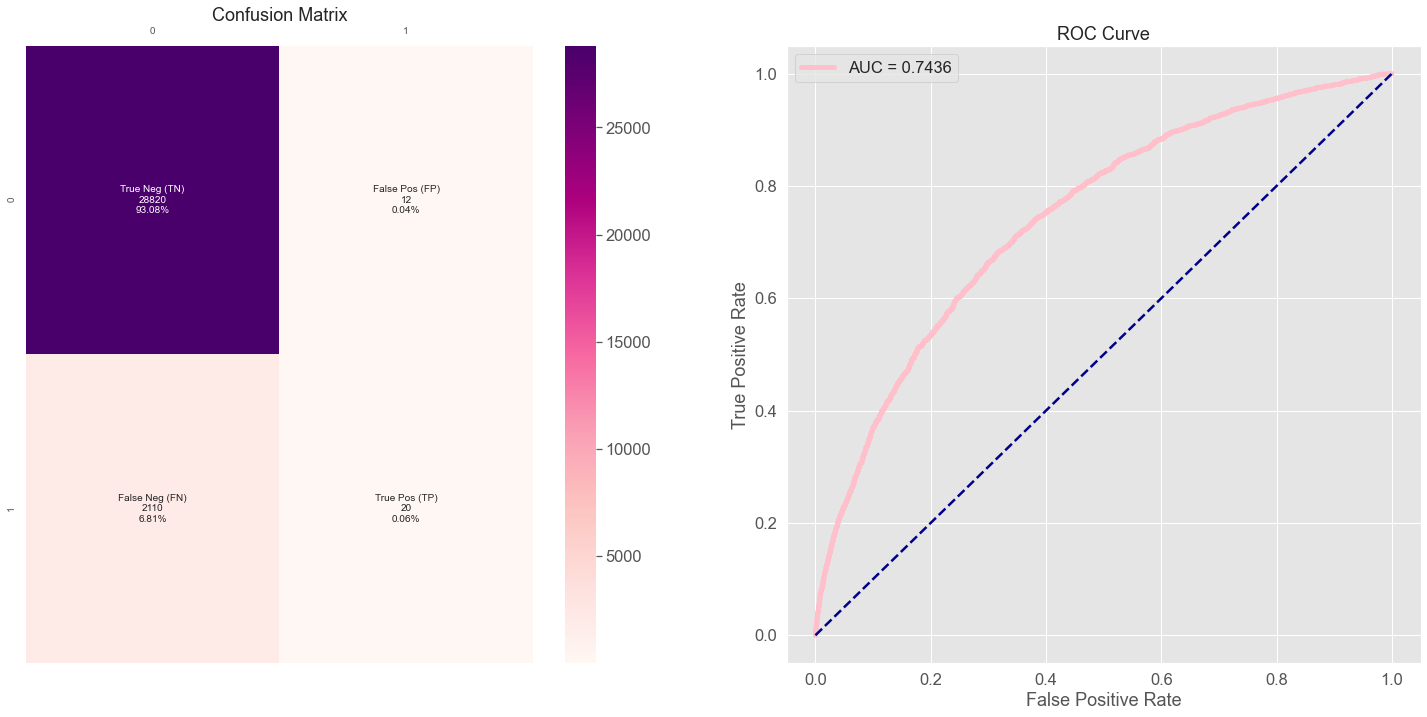

True negative =  28820
False positive =  12
False negative =  2110
True positive =  20
time: 594 ms (started: 2021-12-31 15:19:40 +01:00)


In [16]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [17]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6017519503840408

time: 0 ns (started: 2021-12-31 15:19:58 +01:00)


Le modèle a une performance de plus de 90%. Plus de 90% de nos observations appartiennent à la catégorie 0 (non défaut de paiement), avec une exactitude (accuracy) de plus de 90% (ici 92%). Celà est caractéristique d'un déséquilibre des target. 

Pour pallier à ce déséquilibre, il faut rééquilibrer le jeu de données en faisant class_weight = balanced, de l’undersampling, en enlevant des données de la classe majoritaire, soit en faisant de l’oversampling, en rajoutant des nouvelles données dans la classe minoritaire.


In [18]:
comparison_baseline = pd.DataFrame({})

comparison_baseline = comparison_baseline.append(
    pd.DataFrame(
        {
         "Modele": "Baseline - Regression Logistique",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[0],
    )
)

comparison_baseline

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Baseline - Regression Logistique,0.931464,0.743582,0.00939,0.018501,20,0.625,2110,0.601752,0.038895


time: 0 ns (started: 2021-12-31 15:20:04 +01:00)


## <font color='blue'>LGBMClassifier</font>

Même fonctionnement qu pour XGBoost sauf que l'arbre grandit verticalement.

In [19]:
best_params = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=- 1,
                             learning_rate=0.01, n_estimators=1400, subsample_for_bin=200000, objective='binary',
                             class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0,
                             subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1,
                             silent=True, importance_type='split')

time: 0 ns (started: 2021-12-31 15:20:17 +01:00)


In [20]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train, y_train, X_test, y_test, "Baseline - LGBMClassifier", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.038689
1          399406              0.038556
2          168652              0.096044
3          317387              0.055036
4          371921              0.202348
...           ...                   ...
30957      268716              0.051671
30958      398091              0.030560
30959      228535              0.031953
30960      107632              0.041552
30961      343857              0.112966

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.9313351850655642 pour la méthode Baseline - LGBMClassifier.
 
 
Le score de précision est de 0.5555555555555556 pour la méthode Baseline - LGBMClassifier.
 
 
Le score recall est de 0.009389671361502348 pour la méthode Baseline - LGBMClassifier.
 
 
Le score f1 est de 0.018467220683287166 pour la méthode Baseline - LGBMClassifier.
 
 
Le score AUC est de 0.7613430467190863 pour la méthode Baseline - LGBMClassifier.
 


In [21]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),28816 (TN),16 (FP)
Real Positive (1),2110 (FN),20 (TP)


time: 15 ms (started: 2021-12-31 15:23:39 +01:00)


In [22]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7613
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     28832
         1.0       0.56      0.01      0.02      2130

    accuracy                           0.93     30962
   macro avg       0.74      0.50      0.49     30962
weighted avg       0.91      0.93      0.90     30962

time: 47 ms (started: 2021-12-31 15:23:41 +01:00)


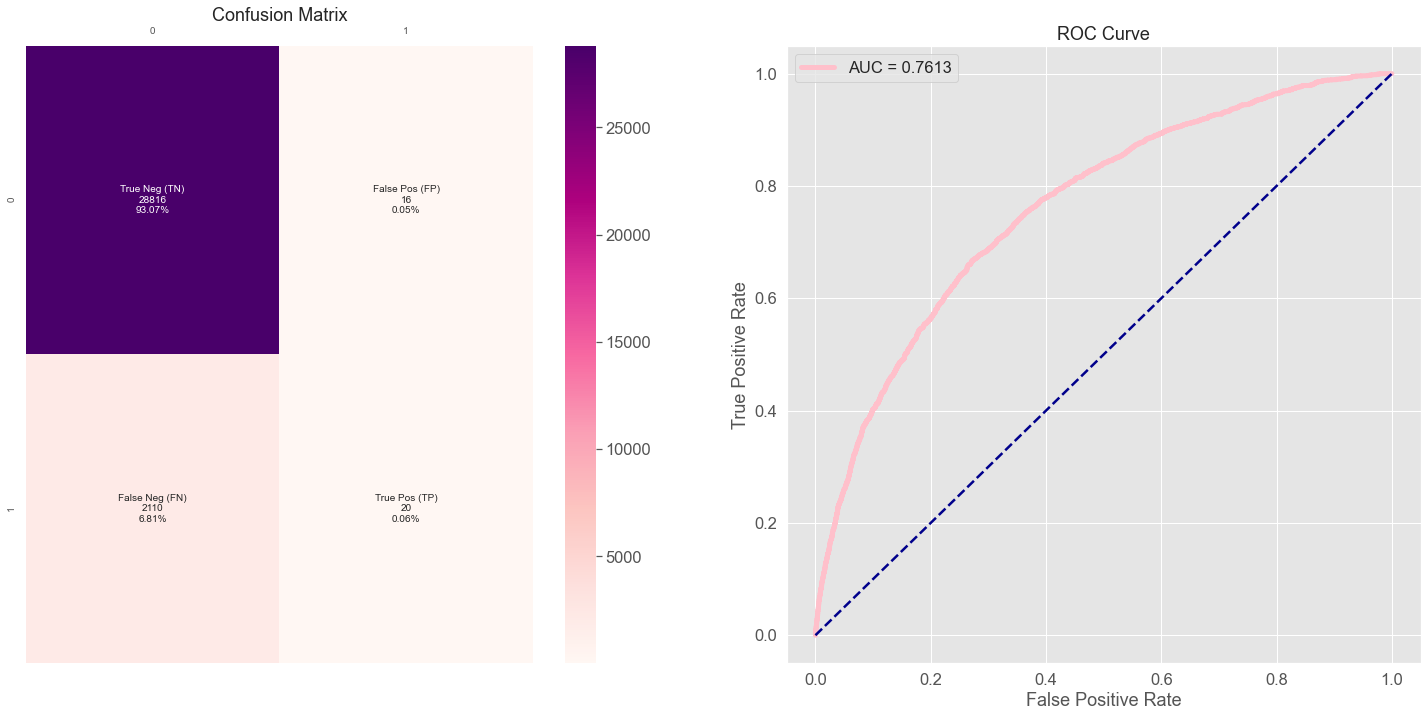

True negative =  28816
False positive =  16
False negative =  2110
True positive =  20
time: 422 ms (started: 2021-12-31 15:23:43 +01:00)


In [23]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [24]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6016689553184748

time: 0 ns (started: 2021-12-31 15:23:46 +01:00)


In [25]:
comparison_baseline = comparison_baseline.append(
    pd.DataFrame(
        {
         "Modele": "Baseline - LGBMClassifier",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[1],
    )
)

comparison_baseline

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Baseline - Regression Logistique,0.931464,0.743582,0.00939,0.018501,20,0.625000,2110,0.601752,0.038895
1,Baseline - LGBMClassifier,0.931335,0.761343,0.00939,0.018467,20,0.555556,2110,0.601669,0.978133


time: 16 ms (started: 2021-12-31 15:23:50 +01:00)


# <font color='green'>Traitement du déséquilibre : The “Imbalanced classification problem" </font>

## <font color='blue'>Class_weight</font>

class_weight=’balanced’

### <font color='grey'>Régression logistique</font>

In [26]:
best_params = LogisticRegression(C=0.1, class_weight='balanced', dual=False, fit_intercept=True,
                                 intercept_scaling=1, l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                                 warm_start=False)

time: 0 ns (started: 2021-12-31 15:23:55 +01:00)


In [27]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class = classification(best_params, X_train, y_train, X_test, y_test, "Class Weight - Regression logistique", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.336624
1          399406              0.318664
2          168652              0.585593
3          317387              0.206161
4          371921              0.713904
...           ...                   ...
30957      268716              0.444533
30958      398091              0.176755
30959      228535              0.298374
30960      107632              0.367853
30961      343857              0.661734

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.6875201860344939 pour la méthode Class Weight - Regression logistique.
 
 
Le score de précision est de 0.13729449091433515 pour la méthode Class Weight - Regression logistique.
 
 
Le score recall est de 0.6704225352112676 pour la méthode Class Weight - Regression logistique.
 
 
Le score f1 est de 0.2279147713670098 pour la méthode Class Weight - Regression logistique.
 
 
Le score AUC est de 0.7435663067379489 pour

In [28]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),19859 (TN),8973 (FP)
Real Positive (1),702 (FN),1428 (TP)


time: 16 ms (started: 2021-12-31 15:24:33 +01:00)


In [29]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7436
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.80     28832
         1.0       0.14      0.67      0.23      2130

    accuracy                           0.69     30962
   macro avg       0.55      0.68      0.52     30962
weighted avg       0.91      0.69      0.76     30962

time: 62 ms (started: 2021-12-31 15:25:15 +01:00)


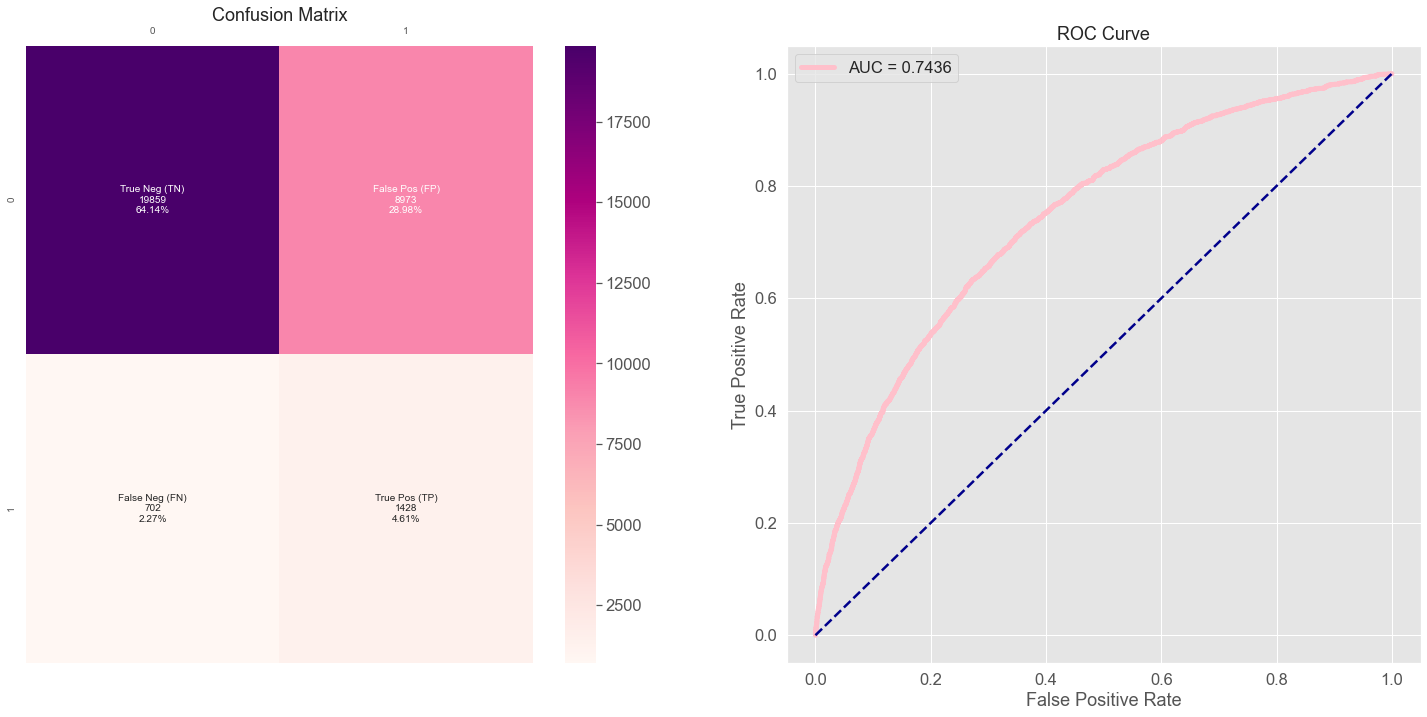

True negative =  19859
False positive =  8973
False negative =  702
True positive =  1428
time: 563 ms (started: 2021-12-31 15:25:18 +01:00)


In [30]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [31]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.681406464561107

time: 0 ns (started: 2021-12-31 15:25:23 +01:00)


In [32]:
comparison_class_weight = pd.DataFrame({})

comparison_class_weight = comparison_class_weight.append(
    pd.DataFrame(
        {
         "Modele": "Class Weight - Regression Logistique",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[0],
    )
)

comparison_class_weight

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Class Weight - Regression Logistique,0.68752,0.743566,0.670423,0.227915,1428,0.137294,702,0.681406,0.035903


time: 16 ms (started: 2021-12-31 15:25:30 +01:00)


### <font color='grey'>LGBMClassifier</font>

In [33]:
best_params = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=- 1,
                             learning_rate=0.01, n_estimators=1400, subsample_for_bin=200000, objective='binary',
                             class_weight='balanced', min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0,
                             subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1,
                             silent=True, importance_type='split')

time: 0 ns (started: 2021-12-31 15:26:37 +01:00)


In [34]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train, y_train, X_test, y_test, "Class Weight - LGBMClassifier", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.269215
1          399406              0.367444
2          168652              0.517213
3          317387              0.241379
4          371921              0.767038
...           ...                   ...
30957      268716              0.341094
30958      398091              0.314401
30959      228535              0.256841
30960      107632              0.356144
30961      343857              0.558350

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.7411665913054712 pour la méthode Class Weight - LGBMClassifier.
 
 
Le score de précision est de 0.1573491730724435 pour la méthode Class Weight - LGBMClassifier.
 
 
Le score recall est de 0.6342723004694836 pour la méthode Class Weight - LGBMClassifier.
 
 
Le score f1 est de 0.25214632325494585 pour la méthode Class Weight - LGBMClassifier.
 
 
Le score AUC est de 0.7602332502227572 pour la méthode Class Weight - L

In [35]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),21597 (TN),7235 (FP)
Real Positive (1),779 (FN),1351 (TP)


time: 16 ms (started: 2021-12-31 15:51:39 +01:00)


In [36]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7602
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.84     28832
         1.0       0.16      0.63      0.25      2130

    accuracy                           0.74     30962
   macro avg       0.56      0.69      0.55     30962
weighted avg       0.91      0.74      0.80     30962

time: 62 ms (started: 2021-12-31 15:51:48 +01:00)


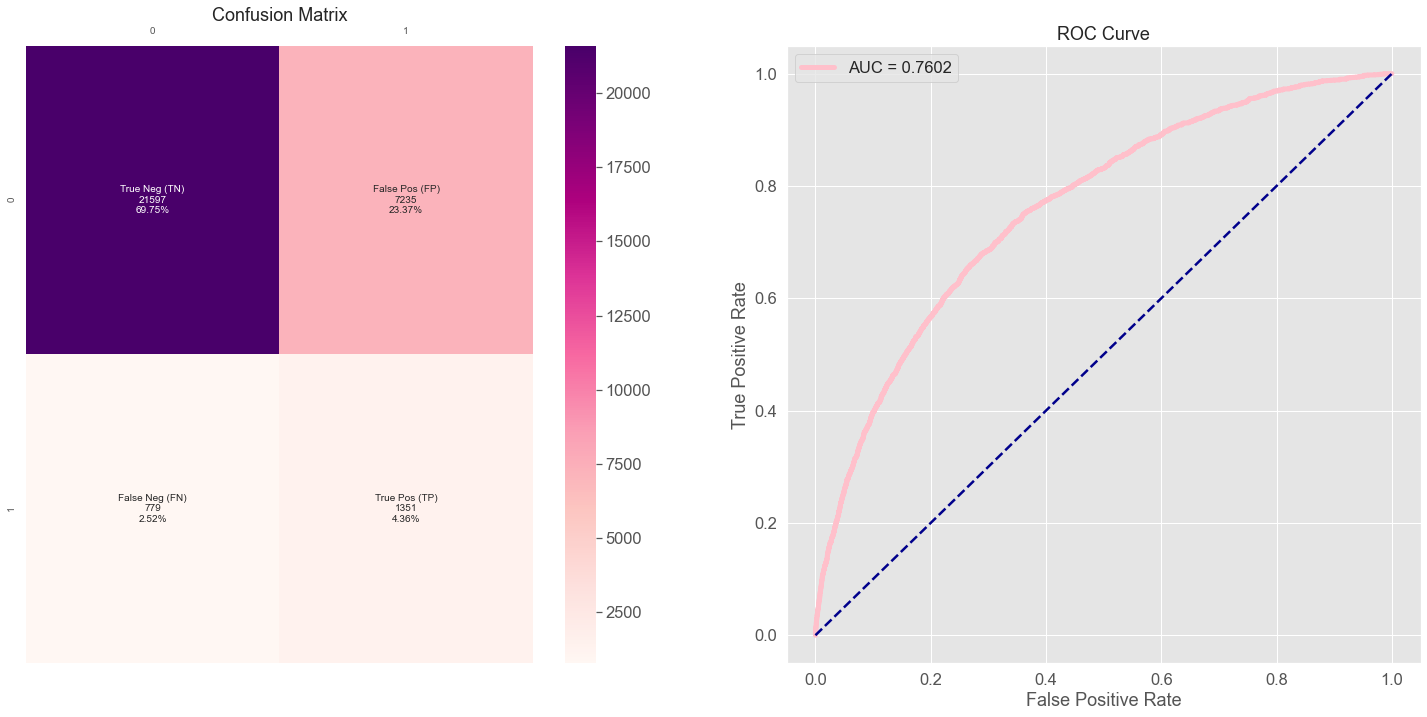

True negative =  21597
False positive =  7235
False negative =  779
True positive =  1351
time: 485 ms (started: 2021-12-31 15:51:55 +01:00)


In [37]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [38]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.7029436840755104

time: 0 ns (started: 2021-12-31 15:52:00 +01:00)


In [39]:
comparison_class_weight = comparison_class_weight.append(
    pd.DataFrame(
        {
         "Modele": "Class Weight - LGBMClassifier",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[1],
    )
)

comparison_class_weight

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Class Weight - Regression Logistique,0.687520,0.743566,0.670423,0.227915,1428,0.137294,702,0.681406,0.035903
1,Class Weight - LGBMClassifier,0.741167,0.760233,0.634272,0.252146,1351,0.157349,779,0.702944,1.367934


time: 16 ms (started: 2021-12-31 15:52:30 +01:00)


## <font color='blue'>Undersampling</font>

### <font color='grey'>Mise en place</font>

Supprimez aléatoirement les exemples de la classe majoritaire. Le sous-échantillonnage aléatoire consiste à sélectionner au hasard des exemples de la classe majoritaire et à les supprimer de l'ensemble de données d'apprentissage.

In [40]:
from imblearn.under_sampling import RandomUnderSampler

time: 0 ns (started: 2021-12-31 15:52:40 +01:00)


In [41]:
print("Label 1, Before using RandomUnderSampler: {} ".format(sum(y_train==1)))
print("Label 0, Before using RandomUnderSampler: {} ".format(sum(y_train==0)))

Label 1, Before using RandomUnderSampler: 8654 
Label 0, Before using RandomUnderSampler: 115191 
time: 16 ms (started: 2021-12-31 15:52:44 +01:00)


In [42]:
rus = RandomUnderSampler(random_state=0)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)
X_train_undersampled = pd.DataFrame(X_train_undersampled, columns=X_train.columns)

time: 250 ms (started: 2021-12-31 15:52:46 +01:00)


In [43]:
print("Label 1, After using RandomUnderSampler: {}".format(sum(y_train_undersampled==1)))
print("Label 0, After using RandomUnderSampler: {}".format(sum(y_train_undersampled==0)))

Label 1, After using RandomUnderSampler: 8654
Label 0, After using RandomUnderSampler: 8654
time: 16 ms (started: 2021-12-31 15:52:49 +01:00)


In [44]:
X_train_undersampled

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,...,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business_Entity_Type_1,ORGANIZATION_TYPE_Business_Entity_Type_2,ORGANIZATION_TYPE_Business_Entity_Type_3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry_type_1,ORGANIZATION_TYPE_Industry_type_10,ORGANIZATION_TYPE_Industry_type_11,ORGANIZATION_TYPE_Industry_type_12,ORGANIZATION_TYPE_Industry_type_13,ORGANIZATION_TYPE_Industry_type_2,ORGANIZATION_TYPE_Industry_type_3,ORGANIZATION_TYPE_Industry_type_4,ORGANIZATION_TYPE_Industry_type_5,ORGANIZATION_TYPE_Industry_type_6,ORGANIZATION_TYPE_Industry_type_7,ORGANIZATION_TYPE_Industry_type_9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal_Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security_Ministries,ORGANIZATION_TYPE_Selfemployed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade_type_1,ORGANIZATION_TYPE_Trade_type_2,ORGANIZATION_TYPE_Trade_type_3,ORGANIZATION_TYPE_Trade_type_4,ORGANIZATION_TYPE_Trade_type_5,ORGANIZATION_TYPE_Trade_type_6,ORGANIZATION_TYPE_Trade_type_7,ORGANIZATION_TYPE_Transport_type_1,ORGANIZATION_TYPE_Transport_type_2,ORGANIZATION_TYPE_Transport_type_3,ORGANIZATION_TYPE_Transport_type_4,ORGANIZATION_TYPE_University,HOUSETYPE_MODE_block_of_flats,HOUSETYPE_MODE_specific_housing,HOUSETYPE_MODE_terraced_house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,WALLSMATERIAL_MODE_Stone_brick,WALLSMATERIAL_MODE_Wooden,MOST_CREDIT_TYPE_Another_type_of_loan,MOST_CREDIT_TYPE_Car_loan,MOST_CREDIT_TYPE_Consumer_credit,MOST_CREDIT_TYPE_Credit_card,MOST_CREDIT_TYPE_Loan_for_business_development,MOST_CREDIT_TYPE_Loan_for_working_capital_replenishment,MOST_CREDIT_TYPE_Microloan,MOST_CREDIT_TYPE_Mortgage,MOST_CREDIT_TYPE_Unknown_type_of_loan
0,0,1,1,0,0,-0.573222,-0.144815,-0.565139,-1.142550,-0.800416,0.018732,-1.090908,-0.853139,1.039624,-0.273951,0.002542,0.458151,-0.46321,0.047807,-0.671139,-0.267116,-0.108965,0.032789,0.100683,0.510382,-0.110786,-0.220085,-0.202500,-0.193282,-0.370518,-0.338066,-0.347398,0.148958,-0.635273,-0.187222,0.124243,-0.597191,-0.119930,-0.705778,

time: 109 ms (started: 2021-12-31 15:52:51 +01:00)


### <font color='grey'>Régression logistique</font>

In [45]:
best_params = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                                 warm_start=False)

time: 0 ns (started: 2021-12-31 15:52:59 +01:00)


In [46]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train_undersampled, y_train_undersampled, X_test, y_test, "RandomUnderSampler Regression logistique", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.329543
1          399406              0.287562
2          168652              0.608540
3          317387              0.225571
4          371921              0.609737
...           ...                   ...
30957      268716              0.486414
30958      398091              0.192391
30959      228535              0.316166
30960      107632              0.391122
30961      343857              0.658070

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.6788644144435114 pour la méthode RandomUnderSampler Regression logistique.
 
 
Le score de précision est de 0.13350220470963506 pour la méthode RandomUnderSampler Regression logistique.
 
 
Le score recall est de 0.668075117370892 pour la méthode RandomUnderSampler Regression logistique.
 
 
Le score f1 est de 0.22253499100789742 pour la méthode RandomUnderSampler Regression logistique.
 
 
Le score AUC est de 0.74051

In [47]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),19596 (TN),9236 (FP)
Real Positive (1),707 (FN),1423 (TP)


time: 16 ms (started: 2021-12-31 15:53:05 +01:00)


In [48]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7405
              precision    recall  f1-score   support

         0.0       0.97      0.68      0.80     28832
         1.0       0.13      0.67      0.22      2130

    accuracy                           0.68     30962
   macro avg       0.55      0.67      0.51     30962
weighted avg       0.91      0.68      0.76     30962

time: 62 ms (started: 2021-12-31 15:53:07 +01:00)


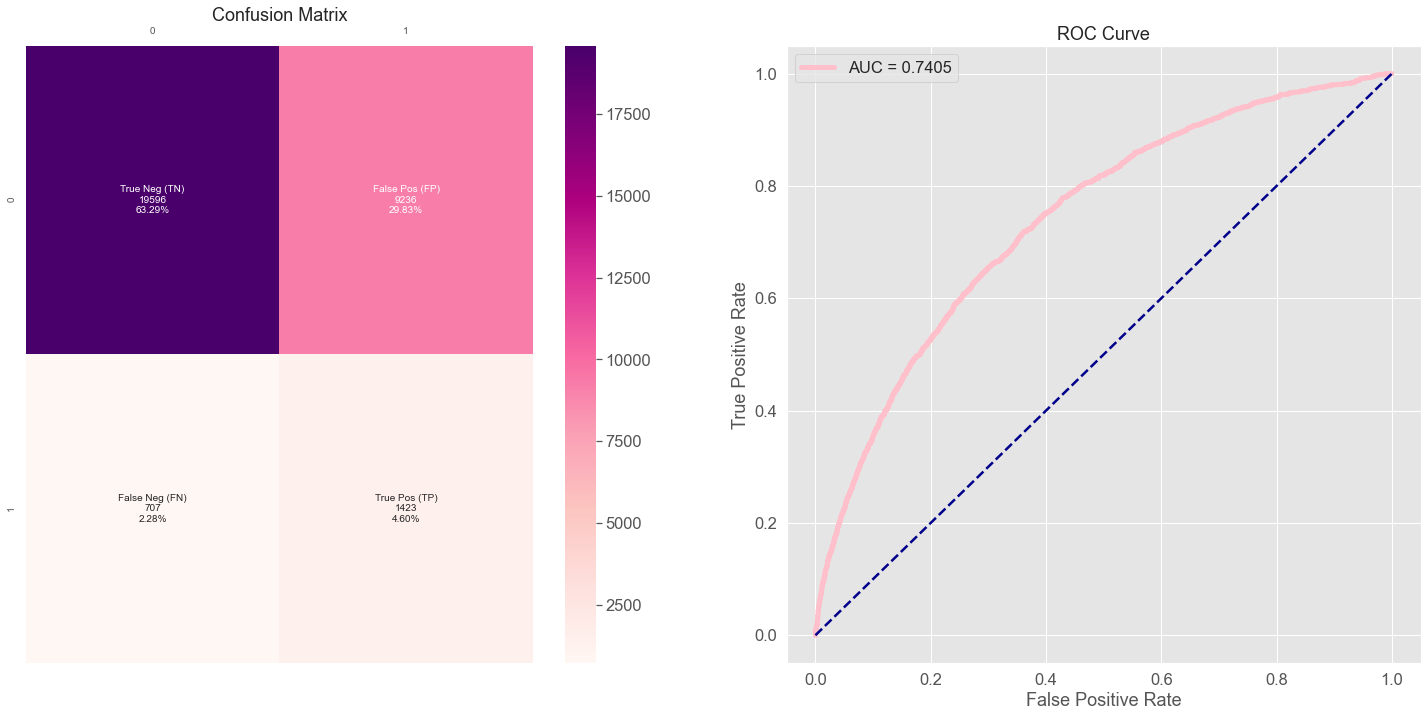

True negative =  19596
False positive =  9236
False negative =  707
True positive =  1423
time: 843 ms (started: 2021-12-31 15:53:10 +01:00)


In [49]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [50]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6750064132550665

time: 0 ns (started: 2021-12-31 15:53:15 +01:00)


In [51]:
comparison_RandomUnderSampler = pd.DataFrame({})

comparison_RandomUnderSampler = comparison_RandomUnderSampler.append(
    pd.DataFrame(
        {
         "Modele": "RandomUnderSampler - Regression Logistique",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[0],
    )
)

comparison_RandomUnderSampler

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,RandomUnderSampler - Regression Logistique,0.678864,0.740516,0.668075,0.222535,1423,0.133502,707,0.675006,0.033375


time: 16 ms (started: 2021-12-31 15:53:19 +01:00)


### <font color='grey'>LGBMClassifier</font>




In [52]:
best_params = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=- 1,
                             learning_rate=0.01, n_estimators=1400, subsample_for_bin=200000, objective='binary',
                             class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0,
                             subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1,
                             silent=True, importance_type='split')

time: 0 ns (started: 2021-12-31 15:53:22 +01:00)


In [53]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train_undersampled, y_train_undersampled, X_test, y_test, "RandomUnderSampler - LGBMClassifier", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.281743
1          399406              0.316225
2          168652              0.478185
3          317387              0.375119
4          371921              0.737132
...           ...                   ...
30957      268716              0.419608
30958      398091              0.294726
30959      228535              0.306393
30960      107632              0.372927
30961      343857              0.377947

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.689070473483625 pour la méthode RandomUnderSampler - LGBMClassifier.
 
 
Le score de précision est de 0.1400864138262122 pour la méthode RandomUnderSampler - LGBMClassifier.
 
 
Le score recall est de 0.6849765258215963 pour la méthode RandomUnderSampler - LGBMClassifier.
 
 
Le score f1 est de 0.23260263053009167 pour la méthode RandomUnderSampler - LGBMClassifier.
 
 
Le score AUC est de 0.7543548867195031 pour la m

In [54]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),19876 (TN),8956 (FP)
Real Positive (1),671 (FN),1459 (TP)


time: 15 ms (started: 2021-12-31 15:53:39 +01:00)


In [55]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7544
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.81     28832
         1.0       0.14      0.68      0.23      2130

    accuracy                           0.69     30962
   macro avg       0.55      0.69      0.52     30962
weighted avg       0.91      0.69      0.77     30962

time: 63 ms (started: 2021-12-31 15:53:43 +01:00)


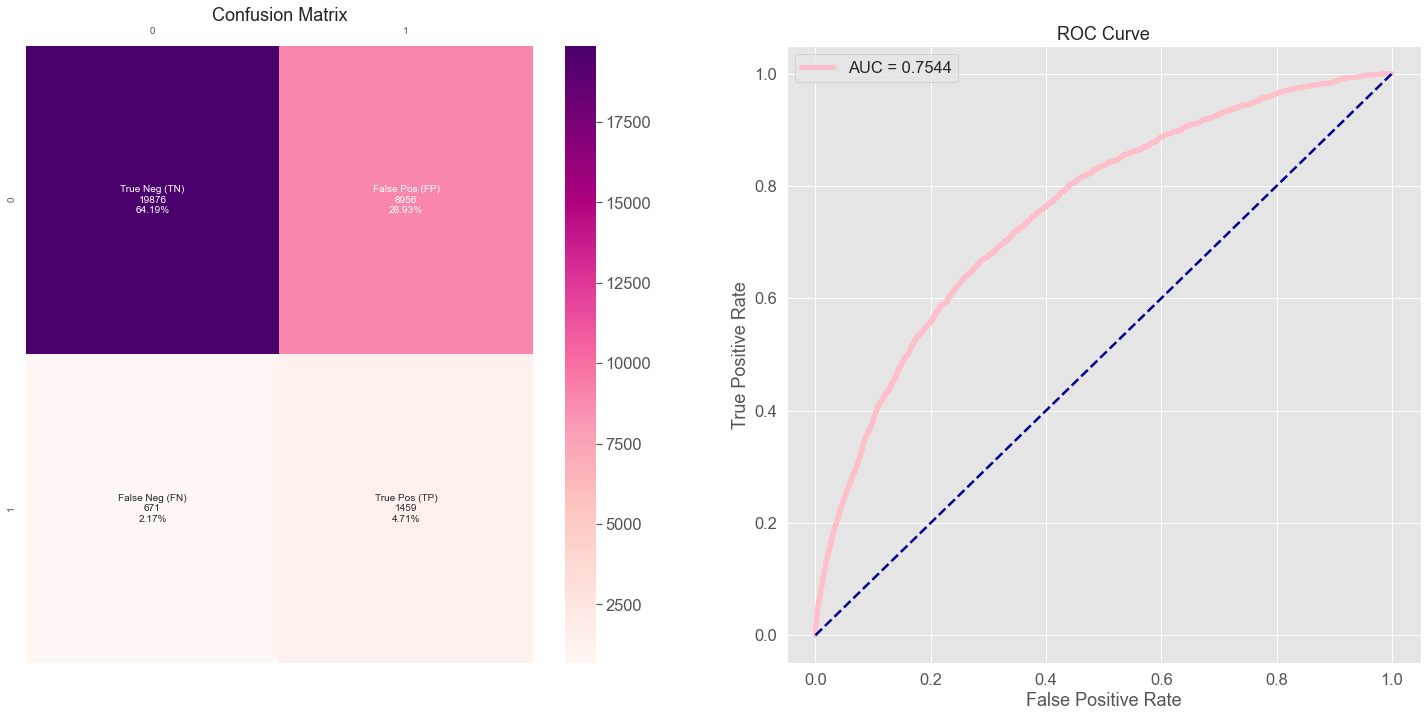

True negative =  19876
False positive =  8956
False negative =  671
True positive =  1459
time: 500 ms (started: 2021-12-31 15:53:46 +01:00)


In [56]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [57]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6876065732091928

time: 0 ns (started: 2021-12-31 15:53:50 +01:00)


In [58]:
comparison_RandomUnderSampler = comparison_RandomUnderSampler.append(
    pd.DataFrame(
        {
         "Modele": "RandomUnderSampler - LGBMClassifier",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[1],
    )
)

comparison_RandomUnderSampler

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,RandomUnderSampler - Regression Logistique,0.678864,0.740516,0.668075,0.222535,1423,0.133502,707,0.675006,0.033375
1,RandomUnderSampler - LGBMClassifier,0.689070,0.754355,0.684977,0.232603,1459,0.140086,671,0.687607,0.912836


time: 15 ms (started: 2021-12-31 15:53:53 +01:00)


## <font color='blue'>Oversampling</font>

C'est une méthode qui va dupliquer aléatoirement des données existantes de la classe minoritaire pour que chaque classe ait le même nombre de données que la classe sur-représentée à l'origine.

### <font color='grey'>Mise en place</font>

In [59]:
from imblearn.over_sampling import RandomOverSampler

time: 0 ns (started: 2021-12-31 15:53:57 +01:00)


In [60]:
print("Label 1, Before using RandomOverSampler: {} ".format(sum(y_train==1)))
print("Label 0, Before using RandomOverSampler: {} ".format(sum(y_train==0)))

Label 1, Before using RandomOverSampler: 8654 
Label 0, Before using RandomOverSampler: 115191 
time: 31 ms (started: 2021-12-31 15:53:59 +01:00)


In [61]:
ros = RandomOverSampler(random_state=0)
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)
X_train_oversampled = pd.DataFrame(X_train_oversampled, columns=X_train.columns)

time: 2.09 s (started: 2021-12-31 15:54:02 +01:00)


In [62]:
print("Label 1, After using RandomOverSampler: {}".format(sum(y_train_oversampled==1)))
print("Label 0, After using RandomOverSampler: {}".format(sum(y_train_oversampled==0)))

Label 1, After using RandomOverSampler: 115191
Label 0, After using RandomOverSampler: 115191
time: 47 ms (started: 2021-12-31 15:54:06 +01:00)


### <font color='grey'>Régression logistique</font>

In [63]:
best_params = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                                 warm_start=False)

time: 0 ns (started: 2021-12-31 15:54:10 +01:00)


In [64]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train_oversampled, y_train_oversampled, X_test, y_test, "RandomOverSampler Regression logistique", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.333546
1          399406              0.328634
2          168652              0.589005
3          317387              0.203854
4          371921              0.687394
...           ...                   ...
30957      268716              0.449427
30958      398091              0.187347
30959      228535              0.295709
30960      107632              0.365292
30961      343857              0.662192

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.6883276274142497 pour la méthode RandomOverSampler Regression logistique.
 
 
Le score de précision est de 0.13748553798688778 pour la méthode RandomOverSampler Regression logistique.
 
 
Le score recall est de 0.6694835680751173 pour la méthode RandomOverSampler Regression logistique.
 
 
Le score f1 est de 0.2281235002399616 pour la méthode RandomOverSampler Regression logistique.
 
 
Le score AUC est de 0.743349183

In [65]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),19886 (TN),8946 (FP)
Real Positive (1),704 (FN),1426 (TP)


time: 15 ms (started: 2021-12-31 15:54:26 +01:00)


In [66]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7433
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.80     28832
         1.0       0.14      0.67      0.23      2130

    accuracy                           0.69     30962
   macro avg       0.55      0.68      0.52     30962
weighted avg       0.91      0.69      0.77     30962

time: 62 ms (started: 2021-12-31 15:54:30 +01:00)


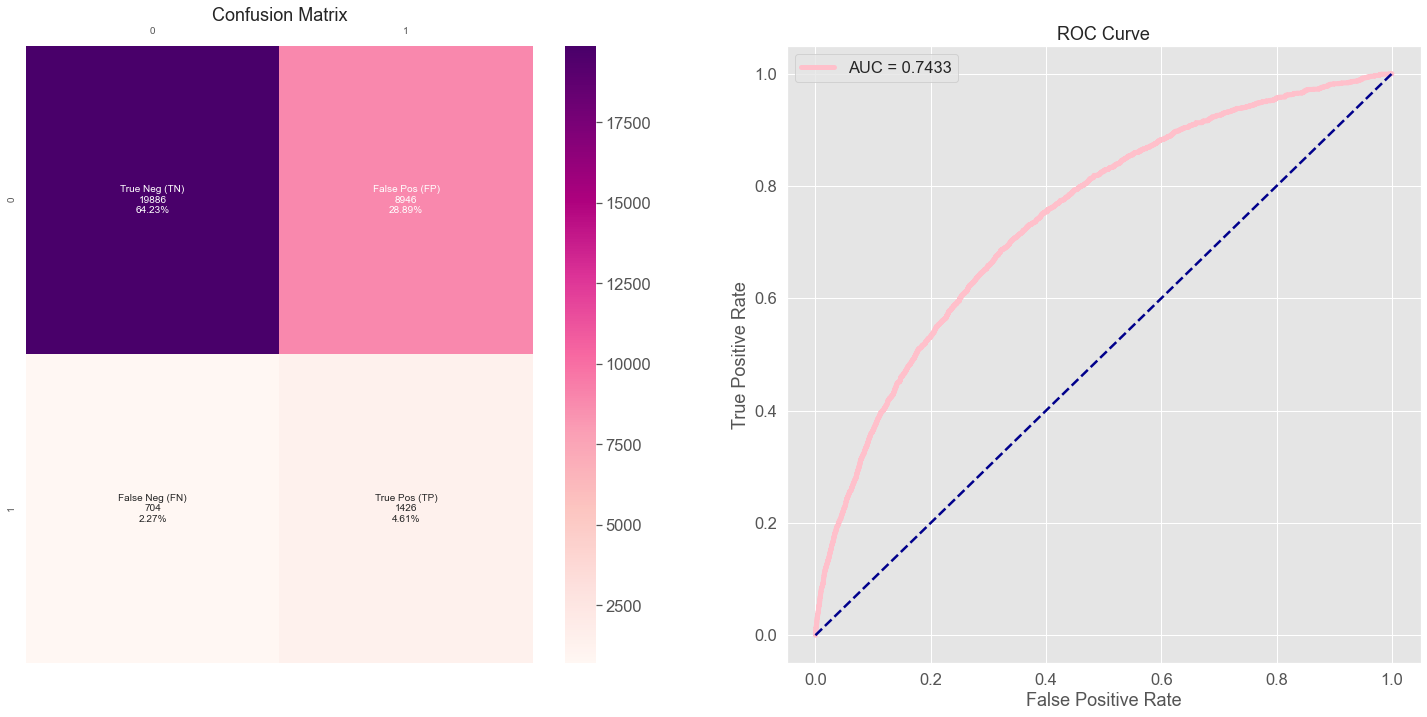

True negative =  19886
False positive =  8946
False negative =  704
True positive =  1426
time: 531 ms (started: 2021-12-31 15:54:33 +01:00)


In [67]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [68]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6815894309556505

time: 0 ns (started: 2021-12-31 15:54:37 +01:00)


In [69]:
comparison_RandomOverSampler = pd.DataFrame({})

comparison_RandomOverSampler = comparison_RandomOverSampler.append(
    pd.DataFrame(
        {
         "Modele": "RandomOverSampler - Regression Logistique",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[0],
    )
)

comparison_RandomOverSampler

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,RandomOverSampler - Regression Logistique,0.688328,0.743349,0.669484,0.228124,1426,0.137486,704,0.681589,0.029529


time: 15 ms (started: 2021-12-31 15:54:41 +01:00)


### <font color='grey'>LGBMClassifier</font>

In [70]:
best_params = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=- 1,
                             learning_rate=0.01, n_estimators=1400, subsample_for_bin=200000, objective='binary',
                             class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0,
                             subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1,
                             silent=True, importance_type='split')

time: 0 ns (started: 2021-12-31 15:54:45 +01:00)


In [71]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train_oversampled, y_train_oversampled, X_test, y_test, "RandomOverSampler - LGBMClassifier", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.283812
1          399406              0.309709
2          168652              0.488739
3          317387              0.194842
4          371921              0.726200
...           ...                   ...
30957      268716              0.346641
30958      398091              0.307897
30959      228535              0.201337
30960      107632              0.290829
30961      343857              0.551512

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.743492022479168 pour la méthode RandomOverSampler - LGBMClassifier.
 
 
Le score de précision est de 0.15682569674067076 pour la méthode RandomOverSampler - LGBMClassifier.
 
 
Le score recall est de 0.6234741784037559 pour la méthode RandomOverSampler - LGBMClassifier.
 
 
Le score f1 est de 0.25061332326854124 pour la méthode RandomOverSampler - LGBMClassifier.
 
 
Le score AUC est de 0.7588065458046095 pour la méth

In [72]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),21692 (TN),7140 (FP)
Real Positive (1),802 (FN),1328 (TP)


time: 16 ms (started: 2021-12-31 15:57:24 +01:00)


In [73]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7588
              precision    recall  f1-score   support

         0.0       0.96      0.75      0.85     28832
         1.0       0.16      0.62      0.25      2130

    accuracy                           0.74     30962
   macro avg       0.56      0.69      0.55     30962
weighted avg       0.91      0.74      0.80     30962

time: 63 ms (started: 2021-12-31 15:57:25 +01:00)


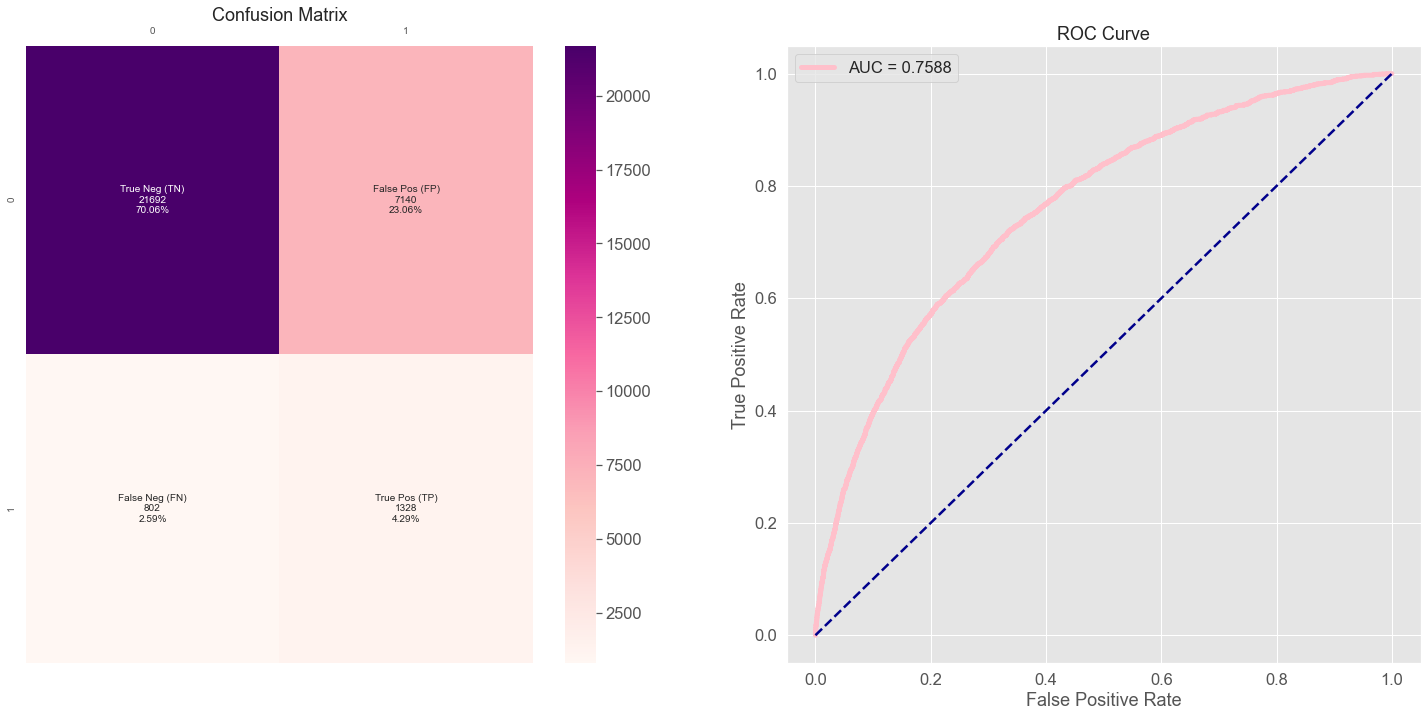

True negative =  21692
False positive =  7140
False negative =  802
True positive =  1328
time: 453 ms (started: 2021-12-31 15:57:28 +01:00)


In [74]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [75]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.7005764384553864

time: 16 ms (started: 2021-12-31 15:57:32 +01:00)


In [76]:
comparison_RandomOverSampler = comparison_RandomOverSampler.append(
    pd.DataFrame(
        {
         "Modele": "RandomOverSampler - LGBMClassifier",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[1],
    )
)

comparison_RandomOverSampler

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,RandomOverSampler - Regression Logistique,0.688328,0.743349,0.669484,0.228124,1426,0.137486,704,0.681589,0.029529
1,RandomOverSampler - LGBMClassifier,0.743492,0.758807,0.623474,0.250613,1328,0.156826,802,0.700576,1.246898


time: 16 ms (started: 2021-12-31 15:57:33 +01:00)


## <font color='blue'>Oversampling (SMOTE)</font>

C'est une méthode qui va créer de nouvelles données de la classe sous-représentée à partir des données existantes (et donc de la variété) pour que chaque classe ait le même nombre de données que la classe sur-représentée à l'origine.

### <font color='grey'>Mise en place</font>

In [77]:
from imblearn.over_sampling import SMOTE

time: 0 ns (started: 2021-12-31 15:57:37 +01:00)


In [78]:
print("Label 1, Before using SMOTE: {} ".format(sum(y_train==1)))
print("Label 0, Before using SMOTE: {} ".format(sum(y_train==0)))

Label 1, Before using SMOTE: 8654 
Label 0, Before using SMOTE: 115191 
time: 32 ms (started: 2021-12-31 15:57:38 +01:00)


In [79]:
sm = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)

time: 3.72 s (started: 2021-12-31 15:57:40 +01:00)


In [80]:
print("Label 1, After using SMOTE: {}".format(sum(y_train_resampled==1)))
print("Label 0, After using SMOTE: {}".format(sum(y_train_resampled==0)))

Label 1, After using SMOTE: 115191
Label 0, After using SMOTE: 115191
time: 31 ms (started: 2021-12-31 15:57:46 +01:00)


### <font color='grey'>Régression logistique</font>

In [81]:
best_params = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                                 warm_start=False)

time: 0 ns (started: 2021-12-31 15:57:50 +01:00)


In [82]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train_resampled, y_train_resampled, X_test, y_test, "SMOTE - Regression logistique", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.056228
1          399406              0.038790
2          168652              0.128394
3          317387              0.021788
4          371921              0.180480
...           ...                   ...
30957      268716              0.135033
30958      398091              0.023112
30959      228535              0.061191
30960      107632              0.060889
30961      343857              0.164774

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.9308184225825205 pour la méthode SMOTE - Regression logistique.
 
 
Le score de précision est de 0.4117647058823529 pour la méthode SMOTE - Regression logistique.
 
 
Le score recall est de 0.013145539906103286 pour la méthode SMOTE - Regression logistique.
 
 
Le score f1 est de 0.025477707006369425 pour la méthode SMOTE - Regression logistique.
 
 
Le score AUC est de 0.7320069673497888 pour la méthode SMOTE - Regre

In [83]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),28792 (TN),40 (FP)
Real Positive (1),2102 (FN),28 (TP)


time: 15 ms (started: 2021-12-31 15:58:03 +01:00)


In [84]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7320
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     28832
         1.0       0.41      0.01      0.03      2130

    accuracy                           0.93     30962
   macro avg       0.67      0.51      0.49     30962
weighted avg       0.90      0.93      0.90     30962

time: 63 ms (started: 2021-12-31 15:58:05 +01:00)


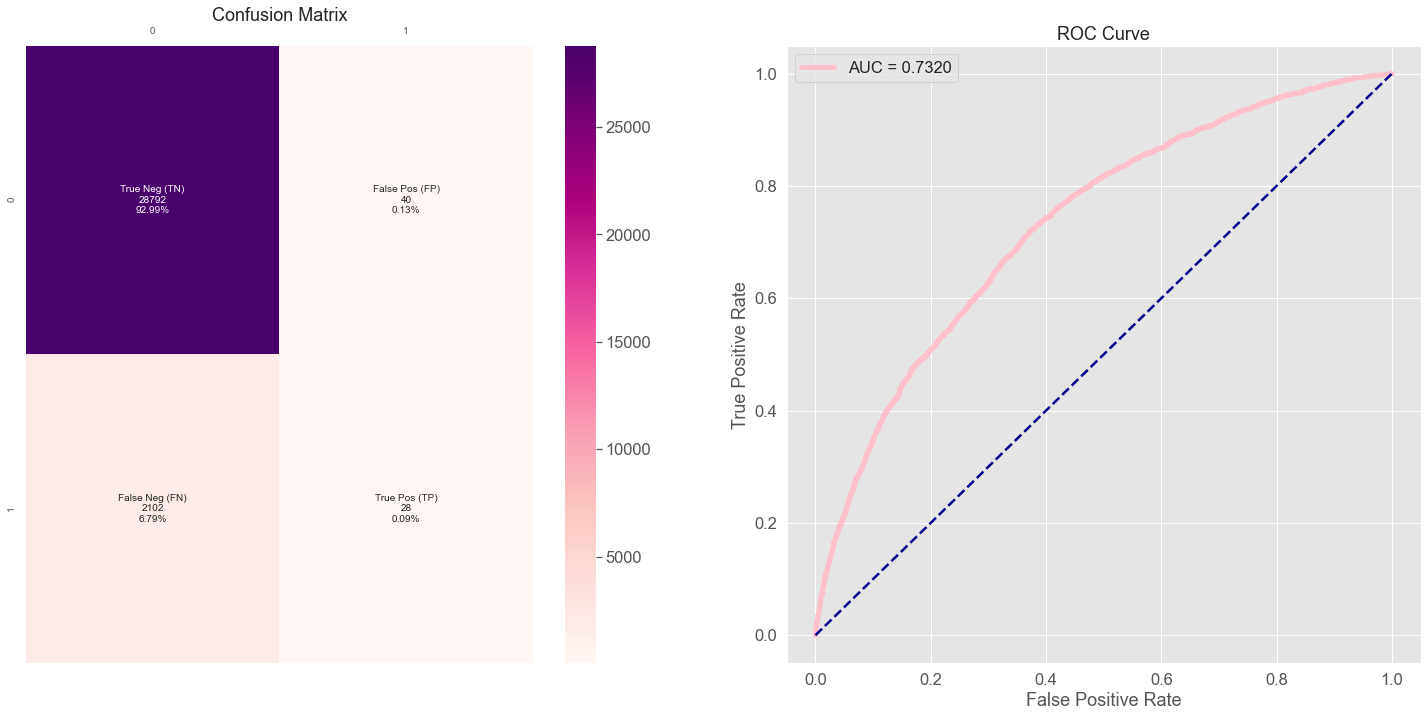

True negative =  28792
False positive =  40
False negative =  2102
True positive =  28
time: 485 ms (started: 2021-12-31 15:58:06 +01:00)


In [85]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [86]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.602679986117189

time: 0 ns (started: 2021-12-31 15:58:10 +01:00)


In [87]:
comparison_smote = pd.DataFrame({})

comparison_smote = comparison_smote.append(
    pd.DataFrame(
        {
         "Modele": "SMOTE - Regression Logistique",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[0],
    )
)

comparison_smote

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,SMOTE - Regression Logistique,0.930818,0.732007,0.013146,0.025478,28,0.411765,2102,0.60268,0.035922


time: 16 ms (started: 2021-12-31 15:58:12 +01:00)


### <font color='grey'>LGBMClassifier</font>

In [88]:
best_params = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=- 1,
                             learning_rate=0.01, n_estimators=1400, subsample_for_bin=200000, objective='binary',
                             class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0,
                             subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1,
                             silent=True, importance_type='split')

time: 0 ns (started: 2021-12-31 15:58:16 +01:00)


In [89]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train_resampled, y_train_resampled, X_test, y_test, "SMOTE - LGBMClassifier", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.053394
1          399406              0.045332
2          168652              0.108949
3          317387              0.024879
4          371921              0.269911
...           ...                   ...
30957      268716              0.065825
30958      398091              0.034880
30959      228535              0.033958
30960      107632              0.057361
30961      343857              0.099558

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.9309476132032815 pour la méthode SMOTE - LGBMClassifier.
 
 
Le score de précision est de 0.4375 pour la méthode SMOTE - LGBMClassifier.
 
 
Le score recall est de 0.013145539906103286 pour la méthode SMOTE - LGBMClassifier.
 
 
Le score f1 est de 0.025524156791248857 pour la méthode SMOTE - LGBMClassifier.
 
 
Le score AUC est de 0.7464336378984228 pour la méthode SMOTE - LGBMClassifier.
 
 
time: 58.8 s (started: 20

In [90]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),28796 (TN),36 (FP)
Real Positive (1),2102 (FN),28 (TP)


time: 15 ms (started: 2021-12-31 16:00:05 +01:00)


In [91]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7464
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     28832
         1.0       0.44      0.01      0.03      2130

    accuracy                           0.93     30962
   macro avg       0.68      0.51      0.49     30962
weighted avg       0.90      0.93      0.90     30962

time: 47 ms (started: 2021-12-31 16:00:06 +01:00)


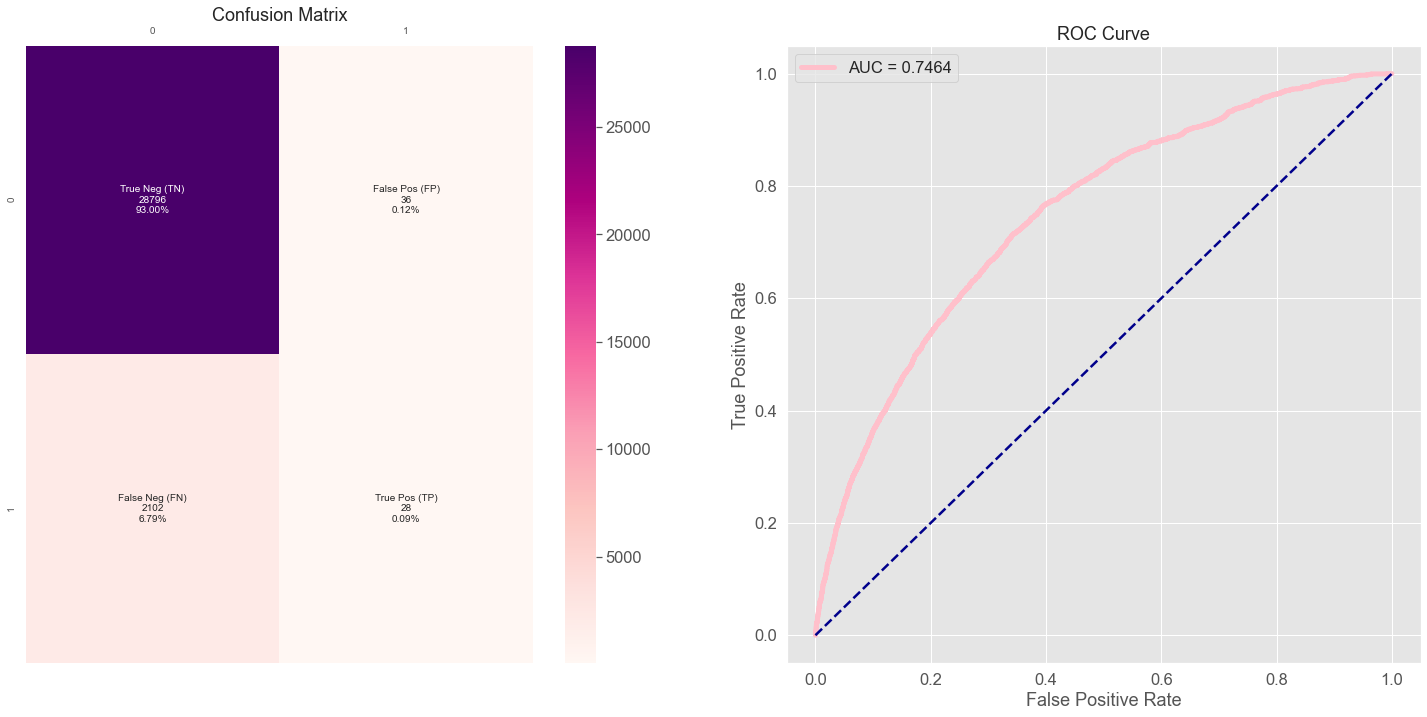

True negative =  28796
False positive =  36
False negative =  2102
True positive =  28
time: 438 ms (started: 2021-12-31 16:00:07 +01:00)


In [92]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [93]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6027629811827552

time: 0 ns (started: 2021-12-31 16:00:10 +01:00)


In [94]:
comparison_smote = comparison_smote.append(
    pd.DataFrame(
        {
         "Modele": "SMOTE - LGBMClassifier",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[1],
    )
)

comparison_smote

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,SMOTE - Regression Logistique,0.930818,0.732007,0.013146,0.025478,28,0.411765,2102,0.602680,0.035922
1,SMOTE - LGBMClassifier,0.930948,0.746434,0.013146,0.025524,28,0.437500,2102,0.602763,1.180458


time: 0 ns (started: 2021-12-31 16:00:11 +01:00)


# <font color='green'>Comparaison modèles </font>

## <font color='violet'>Baseline</font>

In [95]:
comparison_baseline

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Baseline - Regression Logistique,0.931464,0.743582,0.00939,0.018501,20,0.625000,2110,0.601752,0.038895
1,Baseline - LGBMClassifier,0.931335,0.761343,0.00939,0.018467,20,0.555556,2110,0.601669,0.978133


time: 0 ns (started: 2021-12-31 16:00:20 +01:00)


In [96]:
comparison_baseline.to_csv("comparison_baseline.csv", index=False)

time: 32 ms (started: 2021-12-31 16:04:10 +01:00)


L'AUC est maximisé avec l'algorithme  Regression Logistique en Baseline.

Le Recall pour la class 1 est maximisé avec l'algorithme  Regression Logistique en Baseline,on rate donc le moins de TP avec cet algorithme.

Le nombre de TP et FN similaire pour les deux algprithmes.

Le F1_score est maximisé avec l'algorithme  Regression Logistique en Baseline.

La métrique personnelle créée permet de dire que c'est avec l'algorithme Regression Logistique en Baseline que la Banque peut maximiser ses gains lors de l'acceptation d'un prêt.

En Baseline le modèle optimal choisi est  Regression Logistique

## <font color='violet'>Class_weight</font>

In [97]:
comparison_class_weight

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Class Weight - Regression Logistique,0.687520,0.743566,0.670423,0.227915,1428,0.137294,702,0.681406,0.035903
1,Class Weight - LGBMClassifier,0.741167,0.760233,0.634272,0.252146,1351,0.157349,779,0.702944,1.367934


time: 0 ns (started: 2021-12-31 16:04:13 +01:00)


In [98]:
comparison_class_weight.to_csv("comparison_class_weight.csv", index=False)

time: 15 ms (started: 2021-12-31 16:04:18 +01:00)


L'AUC est maximisé avec l'algorithme LGBMClassifier.

Le Recall est maximisé avec l'algorithme Régression logistique et LGBMClassifier, on rate donc le moins de TP avec cet algorithme.

Le nombre de TP (LE PRET N'EST PAS ACCORDE ET LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est maximisé avec l'algorithme Régression logistique et LGBMClassifier.

Le F1_score est maximisé avec l'algorithme LGBMClassifier.

Le nombre de FN ( LE PRET EST ACCORDE MAIS LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est minimisé avec l'algorithme de Régression logistique et LGBMClassifier.

La métrique personnelle créée permet de dire que c'est avec l'algorithme LGBMClassifier que la Banque peut maximiser ses gains lors de l'acceptation d'un prêt.

Avec la méthode Class_weight='balanced'et si on se base sur la métrique d'optimisation des coûts, il s'agit de l'algorithme LGBMClassifier qui maximise les gains.

## <font color='violet'>Undersampling</font>

In [99]:
comparison_RandomUnderSampler

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,RandomUnderSampler - Regression Logistique,0.678864,0.740516,0.668075,0.222535,1423,0.133502,707,0.675006,0.033375
1,RandomUnderSampler - LGBMClassifier,0.689070,0.754355,0.684977,0.232603,1459,0.140086,671,0.687607,0.912836


time: 0 ns (started: 2021-12-31 16:05:21 +01:00)


In [100]:
comparison_RandomUnderSampler.to_csv("comparison_RandomUnderSampler.csv", index=False)

time: 0 ns (started: 2021-12-31 16:05:26 +01:00)


L'AUC est maximisé avec l'algorithme LGBMClassifier.

Le Recall est maximisé avec l'algorithme LGBMClassifier,on rate donc le moins de TP avec cet algorithme.

Le nombre de TP (LE PRET N'EST PAS ACCORDE ET LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est maximisé avec l'algorithme LGBMClassifier.

Le F1_score est maximisé avec l'algorithme LGBMClassifier.

Le nombre de FN ( LE PRET EST ACCORDE MAIS LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est minimisé avec l'algorithme LGBMClassifier.

La métrique personnelle créée permet de dire que c'est avec l'algorithme LGBMClassifier que la Banque peut maximiser ses gains lors de l'acceptation d'un prêt.

Ici, avec la méthode de undersampler, il est clair qu'il s'agit de l'algorithme LGBMClassifier qui est optimal pour notre problème.

## <font color='violet'>Oversampling</font>

In [101]:
comparison_RandomOverSampler

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,RandomOverSampler - Regression Logistique,0.688328,0.743349,0.669484,0.228124,1426,0.137486,704,0.681589,0.029529
1,RandomOverSampler - LGBMClassifier,0.743492,0.758807,0.623474,0.250613,1328,0.156826,802,0.700576,1.246898


time: 15 ms (started: 2021-12-31 16:05:48 +01:00)


In [102]:
comparison_RandomOverSampler.to_csv("comparison_RandomOverSampler.csv", index=False)

time: 16 ms (started: 2021-12-31 16:05:51 +01:00)


L'AUC est maximisé avec l'algorithme LGBMClassifier.

Le Recall est maximisé avec l'algorithme Régression logistique et LGBMClassifier, on rate donc le moins de TP avec ces algorithme.

Le nombre de TP (LE PRET N'EST PAS ACCORDE ET LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est maximisé avec l'algorithme Régression logistique et LGBMClassifier.

Le F1_score est maximisé avec l'algorithme LGBMClassifier.

Le nombre de FN ( LE PRET EST ACCORDE MAIS LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est minimisé avec l'algorithme Régression logistique et LGBMClassifier.

La métrique personnelle créée permet de dire que c'est avec l'algorithme LGBMClassifier que la Banque peut maximiser ses gains lors de l'acceptation d'un prêt.

Avec la méthode oversampler, et si on se base sur la métrique d'optimisation des coups, il s'agit de l'algorithme LGBMClassifier qui maximise les gains.

## <font color='violet'>Oversampling (SMOTE)</font>

In [103]:
comparison_smote

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,SMOTE - Regression Logistique,0.930818,0.732007,0.013146,0.025478,28,0.411765,2102,0.602680,0.035922
1,SMOTE - LGBMClassifier,0.930948,0.746434,0.013146,0.025524,28,0.437500,2102,0.602763,1.180458


time: 0 ns (started: 2021-12-31 16:06:31 +01:00)


In [104]:
comparison_smote.to_csv("comparison_smote.csv", index=False)

time: 0 ns (started: 2021-12-31 16:06:33 +01:00)


L'AUC est maximisé avec l'algorithme LGBMClassifier.

Le Recall est maximisé avec l'algorithme Régression logistique, on rate donc le moins de TP avec cet algorithme.

Le nombre de TP (LE PRET N'EST PAS ACCORDE ET LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est maximisé avec l'algorithme Régression logistique.

Le F1_score est maximisé avec la régression logistique.

Le nombre de FN ( LE PRET EST ACCORDE MAIS LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est minimisé avec l'algorithme Régression logistique.

La métrique personnelle créée permet de dire que c'est avec l'algorithme de Régression logistique que la Banque peut maximiser ses gains lors de l'acceptation d'un prêt.

Avec la méthode SMOTE, on peut dire que l'algorithme optimal est l'algorithme Regression logistique mais avec une faible accuracy. 

Je peux donc dire que l'algorithme optimal après avoir utilisé SMOTE est LGBMClassifier.

## <font color='violet'>Best of the Best</font>

In [105]:
frames = [comparison_baseline, comparison_class_weight, comparison_RandomUnderSampler, comparison_RandomOverSampler, comparison_smote]
result = pd.concat(frames)
result

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Baseline - Regression Logistique,0.931464,0.743582,0.009390,0.018501,20,0.625000,2110,0.601752,0.038895
1,Baseline - LGBMClassifier,0.931335,0.761343,0.009390,0.018467,20,0.555556,2110,0.601669,0.978133
0,Class Weight - Regression Logistique,0.687520,0.743566,0.670423,0.227915,1428,0.137294,702,0.681406,0.035903
1,Class Weight - LGBMClassifier,0.741167,0.760233,0.634272,0.252146,1351,0.157349,779,0.702944,1.367934
0,RandomUnderSampler - Regression Logistique,0.678864,0.740516,0.668075,0.222535,1423,0.133502,707,0.675006,0.033375
1,RandomUnderSampler - LGBMClassifier,0.689070,0.754355,0.684977,0.232603,1459,0.140086,671,0.687607,0.912836
0,RandomOverSampler - Regression Logistique,0.688328,0.743349,0.669484,0.228124,1426,0.137486,704,0.681589,0.029529
1,RandomOverSampler - LGBMClassifier,0.743492,0.758807,0.623474,0.250613,1328,0.156826,802,0.700576,1.246898
0,SMOTE - Regression Logistique,0.930818,0.732007,0.013146,0.025478,28,0.411765,2102,0.602680,0.035922
1,SMOTE - LGBMClassifier,0.930948,0.746434,0.013146,0.025524,28,0.437500,2102,0.602763,1.180458


time: 16 ms (started: 2021-12-31 16:06:46 +01:00)


In [106]:
result.to_csv("all_comparison_method.csv", index=False)

time: 16 ms (started: 2021-12-31 16:06:51 +01:00)


In [107]:
comparison_finale = pd.DataFrame({})

comparison_finale = comparison_finale.append(
    pd.DataFrame(
        {
         "Modele": "Baseline -  Regression Logistique",
         "Accuracy": 0.931464,
         "AUC": 0.743582,
         "Recall class 1":0.00939,
         "F1":0.018501,   
         "TP":20,
         "Precision":0.625000,
         "FN":2110,
         "score Gain":0.601752,
         "time": 0.038895
        },
        index=[0],
    )
)						

comparison_finale = comparison_finale.append(
    pd.DataFrame(
        {
         "Modele": "Class Weight - LGBMClassifier",
         "Accuracy": 0.741167,
         "AUC": 0.760122,
         "Recall class 1":0.632394,
         "F1":0.251588,   
         "TP":1347,
         "Precision":0.157030,
         "FN":783,
         "score Gain":0.702272,
         "time": 1.237642
        },
        index=[1],
    )
)	


comparison_finale = comparison_finale.append(
    pd.DataFrame(
        {
         "Modele": "RandomUnderSampler - LGBMClassifier",
         "Accuracy": 0.689426,
         "AUC": 0.754453,
         "Recall class 1": 0.683099,
         "F1": 0.232317,   
         "TP": 1455,
         "Precision": 0.139958,
         "FN": 675,
         "score Gain": 0.687163,
         "time": 1.307599
        },
        index=[2],
    )
)

comparison_finale = comparison_finale.append(
    pd.DataFrame(
        {
         "Modele": "RandomOverSampler - LGBMClassifier",
         "Accuracy": 0.744299,
         "AUC": 0.759012,
         "Recall class 1": 0.629108,
         "F1": 0.252902,   
         "TP": 1340,
         "Precision": 0.158261,
         "FN": 790,
         "score Gain": 0.703110,
         "time": 1.275609
        },
        index=[3],
    )
)

comparison_finale = comparison_finale.append(
    pd.DataFrame(
        {
         "Modele": "SMOTE - LGBMClassifier",
         "Accuracy": 0.931497,
         "AUC": 0.754088,
         "Recall class 1": 0.016432,
         "F1": 0.031949,   
         "TP": 35,
         "Precision": 0.573770,
         "FN": 2095,
         "score Gain": 0.604291,
         "time": 1.475769
        },
        index=[4],
    )
)

time: 15 ms (started: 2021-12-31 16:09:41 +01:00)


In [108]:
comparison_finale

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Baseline - Regression Logistique,0.931464,0.743582,0.009390,0.018501,20,0.625000,2110,0.601752,0.038895
1,Class Weight - LGBMClassifier,0.741167,0.760122,0.632394,0.251588,1347,0.157030,783,0.702272,1.237642
2,RandomUnderSampler - LGBMClassifier,0.689426,0.754453,0.683099,0.232317,1455,0.139958,675,0.687163,1.307599
3,RandomOverSampler - LGBMClassifier,0.744299,0.759012,0.629108,0.252902,1340,0.158261,790,0.703110,1.275609
4,SMOTE - LGBMClassifier,0.931497,0.754088,0.016432,0.031949,35,0.573770,2095,0.604291,1.475769


time: 15 ms (started: 2021-12-31 16:09:49 +01:00)


In [109]:
comparison_finale.to_csv("comparison_finale.csv", index=False)

time: 0 ns (started: 2021-12-31 16:09:52 +01:00)


L'AUC est maximisé avec l'algorithme Class Weight - LGBMClassifier.

Le Recall est maximisé avec l'algorithme RandomUnderSampler - LGBMClassifier.

Le F1_score est maximisé avec l'algorithme RandomOverSampler - LGBMClassifier.

Le nombre de TP (LE PRET N'EST PAS ACCORDE ET LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est maximisé avec l'algorithme RandomUnderSampler - LGBMClassifier.

Le nombre de FN ( LE PRET EST ACCORDE MAIS LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est minimisé avec l'algorithme RandomUnderSampler - LGBMClassifier.

La métrique personnelle créée permet de dire que c'est avec l'algorithme RandomOverSampler - LGBMClassifier que la Banque peut maximiser ses gains lors de l'acceptation d'un prêt.

Au vue des comparaisons précédentes, RandomUnderSampler - LGBMClassifier et RandomOverSampler - LGBMClassifier sont les modèles optimums pour notre problème mais je décide de garder pour la suite l'RandomUnderSampler - LGBMClassifier qui a le meilleur recall ce qui évitera d'accorder des prêts à des personnes qui ne peuvent pas rembourser(le but est d'avoir un recall important pour la prédiction des 1) tout en ayant un gain d'argent important pour la banque (score gain important).

# <font color='green'>Analyse avec le meilleur modèle retenu</font>

## <font color='blue'>Exécution au seuil 0,50 (de base dans sklearn)</font>

In [110]:
print("Label 1, Before using RandomUnderSampler: {} ".format(sum(y_train==1)))
print("Label 0, Before using RandomUnderSampler: {} ".format(sum(y_train==0)))

Label 1, Before using RandomUnderSampler: 8654 
Label 0, Before using RandomUnderSampler: 115191 
time: 31 ms (started: 2021-12-31 16:11:18 +01:00)


In [112]:
rus = RandomUnderSampler(random_state=0)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)
X_train_undersampled = pd.DataFrame(X_train_undersampled, columns=X_train.columns)

time: 234 ms (started: 2021-12-31 16:11:46 +01:00)


In [113]:
print("Label 1, After using RandomUnderSampler: {}".format(sum(y_train_undersampled==1)))
print("Label 0, After using RandomUnderSampler: {}".format(sum(y_train_undersampled==0)))

Label 1, After using RandomUnderSampler: 8654
Label 0, After using RandomUnderSampler: 8654
time: 16 ms (started: 2021-12-31 16:11:49 +01:00)


In [114]:
best_model = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=- 1,
                             learning_rate=0.01, n_estimators=1400, subsample_for_bin=200000, objective='binary',
                             class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0,
                             subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1,
                             silent=True, importance_type='split')

time: 0 ns (started: 2021-12-31 16:12:12 +01:00)


In [115]:
model_fitted = best_model.fit(X_train_undersampled, y_train_undersampled)

time: 9.14 s (started: 2021-12-31 16:12:22 +01:00)


In [116]:
import pickle
pickle.dump(model_fitted, open('best_final_prediction.pickle', 'wb'))

time: 203 ms (started: 2021-12-31 16:13:13 +01:00)


In [117]:
probability = best_model.predict_proba(X_test)
probability_default_payment = probability[:, 1]
probability_default_payment

array([0.28174319, 0.31622496, 0.47818473, ..., 0.30639292, 0.37292717,
       0.37794718])

time: 922 ms (started: 2021-12-31 16:13:16 +01:00)


In [118]:
prediction = best_model.predict(X_test)
prediction

array([0., 0., 0., ..., 0., 0., 0.])

time: 907 ms (started: 2021-12-31 16:13:22 +01:00)


In [119]:
predictive_class_50 = pd.DataFrame({'SK_ID_CURR': X_test.index, 'probability_default_payment': prediction})

time: 0 ns (started: 2021-12-31 16:13:28 +01:00)


In [120]:
accuracy = accuracy_score(y_test, prediction)
print(colored('L\'accuracy score est de {} .\n \n '.format(
        accuracy), 'blue'))

L'accuracy score est de 0.689070473483625 .
 
 
time: 16 ms (started: 2021-12-31 16:13:31 +01:00)


Le modèle a une accuracy de 69% ce qui nous permet de dire que 69% des individus sont bien classés avec ce modèle et que le modèle a une bonne justesse de prédiction.

In [121]:
precision = precision_score(y_test, prediction, average='binary')
print(colored('Le score de précision est de {}.\n \n '.format(
        precision), 'blue'))

Le score de précision est de 0.1400864138262122.
 
 
time: 16 ms (started: 2021-12-31 16:13:49 +01:00)


Le modèle a une précision de 13% ce qui montre qu'une proportion de 87% de classification positive (individus en défaut de paiement) était correcte donc il y a 13% de vrai positif pour 87% de faux positif. Moins il y a de faux positif plus la précision se rapproche de 1,0. 

In [122]:
recall = recall_score(y_test, prediction, average='binary')
print(colored('Le score recall est de {}.\n \n '.format(
        recall), 'blue'))

Le score recall est de 0.6849765258215963.
 
 
time: 15 ms (started: 2021-12-31 16:13:53 +01:00)


Cette métrique montre la proportion de résultats positifs réels correctement identifiée. Un modèle ne produisant pas de faux négatif à un rappel de 1. 

Notre modèle a un rappel de 0,68. En d'autres termes, il identifie correctement 68 % des individus défaillants pour le paiement.



In [123]:
f1 = f1_score(y_test, prediction, average='binary')
print(colored('Le score f1 est de {}.\n \n '.format(
        f1), 'blue'))

Le score f1 est de 0.23260263053009167.
 
 
time: 16 ms (started: 2021-12-31 16:14:01 +01:00)


Le score F1 est la moyenne harmonique de la précision et du recall qui est une mesure de la performance de la capacité de classification du modèle car il prend en compte le nombre de faux positifs et négatifs. Plus ce terme est grand, plus performant est le modèle. 

In [124]:
AUC = roc_auc_score(y_test, probability_default_payment)       
print(colored('Le score AUC est de {}.\n \n '.format(
        AUC), 'blue'))

Le score AUC est de 0.7543548867195031.
 
 
time: 0 ns (started: 2021-12-31 16:14:35 +01:00)


L'AUC correspond à l'aire sous la courbe ROC Plus l’AUC est grande, meilleur est le modèle.

In [125]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),19876 (TN),8956 (FP)
Real Positive (1),671 (FN),1459 (TP)


time: 15 ms (started: 2021-12-31 16:14:42 +01:00)


In [126]:
X_test.shape

(30962, 210)

time: 0 ns (started: 2021-12-31 16:14:45 +01:00)


In [127]:
X_train_undersampled.shape

(17308, 210)

time: 0 ns (started: 2021-12-31 16:14:51 +01:00)


In [128]:
roc_auc = roc_auc_score(y_test, probability_default_payment) 
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7544
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.81     28832
         1.0       0.14      0.68      0.23      2130

    accuracy                           0.69     30962
   macro avg       0.55      0.69      0.52     30962
weighted avg       0.91      0.69      0.77     30962

time: 78 ms (started: 2021-12-31 16:14:55 +01:00)


Ce modèle est intéressant car pour la détection des défauts de paiement (1), le recall est de 0,68 ce qui évitera d'accorder des prêts à des personnes qui ne peuvent pas rembourser( le but est d'avoir un recall impoortant pour la prédiction des 1).

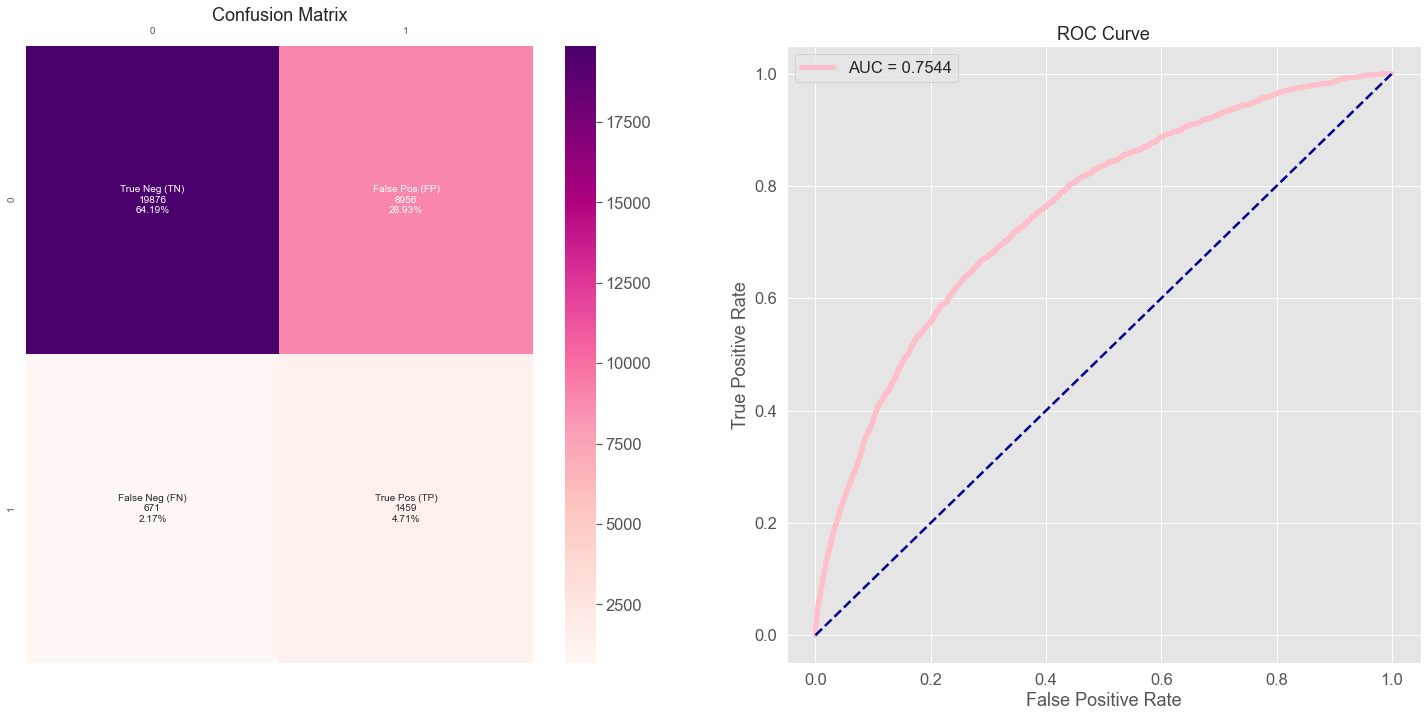

True negative =  19876
False positive =  8956
False negative =  671
True positive =  1459
time: 656 ms (started: 2021-12-31 16:14:57 +01:00)


In [129]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [130]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6876065732091928

time: 0 ns (started: 2021-12-31 16:15:02 +01:00)


In [131]:
comparison_thresh = pd.DataFrame({})

comparison_thresh = comparison_thresh.append(
    pd.DataFrame(
        {
         "Modele": "Avant de déterminer le seuil optimal (0,50)",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
        },
        index=[0],
    )
)
comparison_thresh

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain
0,"Avant de déterminer le seuil optimal (0,50)",0.68907,0.754355,0.684977,0.232603,1459,0.140086,671,0.687607


time: 0 ns (started: 2021-12-31 16:15:09 +01:00)


## <font color='blue'>Ordre de grandeur optimal pour les coefficients de la fonction coût ?</font>

Des coefficients arbitraires ont précédemment été définis mais ceux-ci ne sont peut-être pas optimums. Le coefficient de FN est celui qui a la plus grande importance dans notre métrique mais le coefficient a-t-il le bon ordre de grandeur. Pour vérifier cela, le score gain a été recalculé avec le modèle optimal pour différents seuils de probabilité en variant l'ordre de grandeur du coefficient FN

In [132]:
int_seuil = np.arange(0.0, 1.01, 0.01)

coeff_fn = [-1000, -100, -10]

scor_int_1000 = []
scor_int_100 = []
scor_int_10 = []

scor_int = [scor_int_1000,scor_int_100,scor_int_10]


for idx, lis in enumerate(scor_int):
    for s in int_seuil:
      # Score du modèle : 0 à 1
      y_seuil=[]
      for i in probability_default_payment:
        if i >= s:
          y_seuil.append(1)
        elif i < s:
          y_seuil.append(0)
        
      tn, fp, fn, tp = confusion_matrix(y_test, y_seuil, labels=[0, 1]).ravel()

      scor_int[idx].append(score_banq(tn, fp, fn, tp, 10, -1, coeff_fn[idx], 0))

time: 5.33 s (started: 2021-12-31 16:15:45 +01:00)


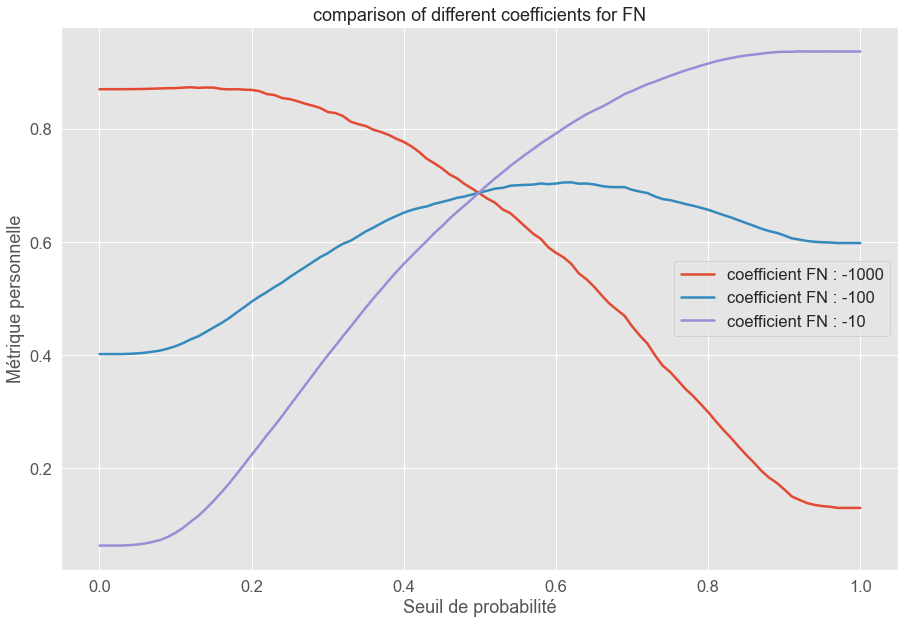

time: 234 ms (started: 2021-12-31 16:16:02 +01:00)


In [133]:
# Affichage du gain en fonction du seuil de solvabilité    
plt.figure(figsize=(15, 10))
plt.plot(int_seuil, scor_int_1000, label = "coefficient FN : -1000")
plt.plot(int_seuil, scor_int_100, label = "coefficient FN : -100")
plt.plot(int_seuil, scor_int_10, label = "coefficient FN : -10")
plt.xlabel("Seuil de probabilité")
plt.ylabel("Métrique personnelle")
plt.title('comparison of different coefficients for FN')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

Ces courbes montrent que la métrique personnelle est pertinente pour notre problématique. 
Lorque l'on donne un coefficient de -1000 pour les FN, le seuil optimal pour que la banque ait le maximum de gain d'argent se situe aux alentours d'une probabilité de 0,2 à partir de laquelle on peut voir que la courbe des gains décroit rapidement. Ce coefficient est trop strict car seules les personnes avec une probabilité de défaut de paiement < 0,2% se voient accepter leur prêt ce qui correspond à peu de personnes.


Au contraire, lorsque l'on donne un coefficient de -10 pour les FN, on peut dire que la banque est trop laxiste dans le choix des clients pour l'accord d'un prêt car le seuil optimal pour que la banque ait le maximum de gain d'argent se situe aux alentours d'une probabilité de 0,9 et toutes les personnes avec une probabilité de défaut de paiement < 0,9% se verraient accepter leur prêt ce qui correspond à peu de personnes.

Un coefficient de - 100 est mieux adapté car le seuil optimal se situerait aux alentours de 0,55 ce qui est correct pour déterminer si oui ou non le prêt est accepté. 

## <font color='blue'>Seuil optimal pour maximiser les gains de la banque</font>

La métrique personnelle gain doit être maximisée pour que la banque gagne le plus d'argent et ainsi permettre de déterminer à partir de quel seuil de probabilité un client est considéré comme solvable ou non. Généralement le seuil de probabilité choisi par les modèles pour classer les individus est de 0,5 mais au vu de la courbe du score gain, il ne s'agit pas du seuil optimal pour que la banque maximise ses gains.   

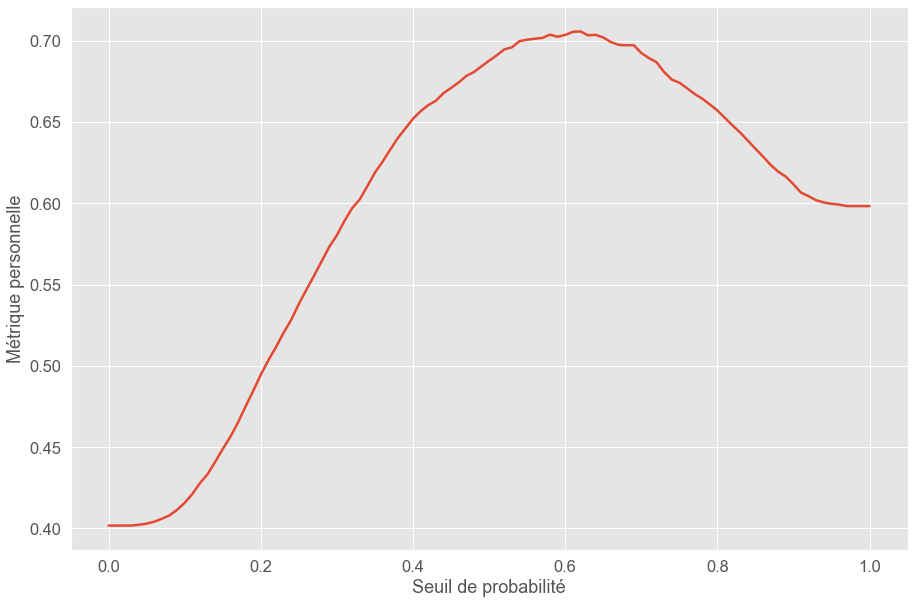

time: 1.86 s (started: 2021-12-31 16:17:03 +01:00)


In [134]:
scor_int = []
int_seuil = np.arange(0.0, 1.01, 0.01)

for s in int_seuil:
    
  # Score du modèle : 0 à 1
  y_seuil=[]

  for i in probability_default_payment:
    if i >= s:
      y_seuil.append(1)
    elif i < s:
       y_seuil.append(0)

  tn, fp, fn, tp = confusion_matrix(y_test, y_seuil, labels=[0, 1]).ravel()
  
  scor_int.append(score_banq(tn, fp, fn, tp, 10, -1, -100, 0))
    
# Affichage du gain en fonction du seuil de solvabilité    
plt.figure(figsize=(15, 10))
plt.plot(int_seuil, scor_int)
plt.xlabel("Seuil de probabilité")
plt.ylabel("Métrique personnelle")
plt.show()

Nous pouvons voir sur ce graphique qu'il y a un pic maximum ce qui correspond au seuil optimal que devrait choisir la banque lors de l'accord ou non d'un prêt pour avoir le maximum de gain.

In [135]:
seuil = pd.DataFrame(columns=['int_seuil','scor_int'])
seuil['int_seuil'] = int_seuil
seuil['scor_int'] = scor_int

time: 15 ms (started: 2021-12-31 16:17:28 +01:00)


In [136]:
max = pd.DataFrame(seuil[seuil['scor_int'] == seuil['scor_int'].max()])
max

,int_seuil,scor_int
62,0.62,0.705624


time: 0 ns (started: 2021-12-31 16:17:32 +01:00)


In [137]:
seuil = max.iloc[0]['int_seuil']

time: 0 ns (started: 2021-12-31 16:17:38 +01:00)


Le seuil optimal pour que la banque fasse le maximum de gain est de 0.6.

## <font color='blue'>Exécution au seuil optimal pour la banque </font>

In [138]:
prediction = []

for i in probability_default_payment:
    if i >= seuil:
      prediction.append(1)
    elif i < seuil:
       prediction.append(0)

time: 15 ms (started: 2021-12-31 16:17:48 +01:00)


In [139]:
def test_train_col_category(dataframe_train, dataframe_test, col, size, seuil):
    """This function represents the categorical variables as a pie plot.
    dataframe : dataset
    size : size of the figure (X,X)"""
    values_train = dataframe_train[col].value_counts()
    labels_train = dataframe_train[col].value_counts().index
    values_test = dataframe_test[col].value_counts()
    labels_test = dataframe_test[col].value_counts().index
    
    plt.figure(figsize=size)
    
    #pie plot
    plt.subplot(2, 2, 1)
    plt.title("Distribution of clients at threshold 0.50", fontsize=20)
    plt.pie(values_train, labels=labels_train,
            autopct='%.1f%%', shadow=True, textprops={'fontsize': 20})
    
    
    # Pie Plot
    plt.subplot(2, 2, 2)
    plt.title("Distribution of clients at threshold {}" .format(
        seuil), fontsize=20)
    plt.pie(values_test, labels=labels_test,
            autopct='%.1f%%', shadow=True, textprops={'fontsize': 20})
    plt.axis('equal')
    plt.tight_layout()
    plt.legend()
    plt.show()

time: 0 ns (started: 2021-12-31 16:17:52 +01:00)


In [140]:
predictive_class_54 = pd.DataFrame({'SK_ID_CURR': X_test.index, 'probability_default_payment': prediction})

time: 0 ns (started: 2021-12-31 16:17:55 +01:00)


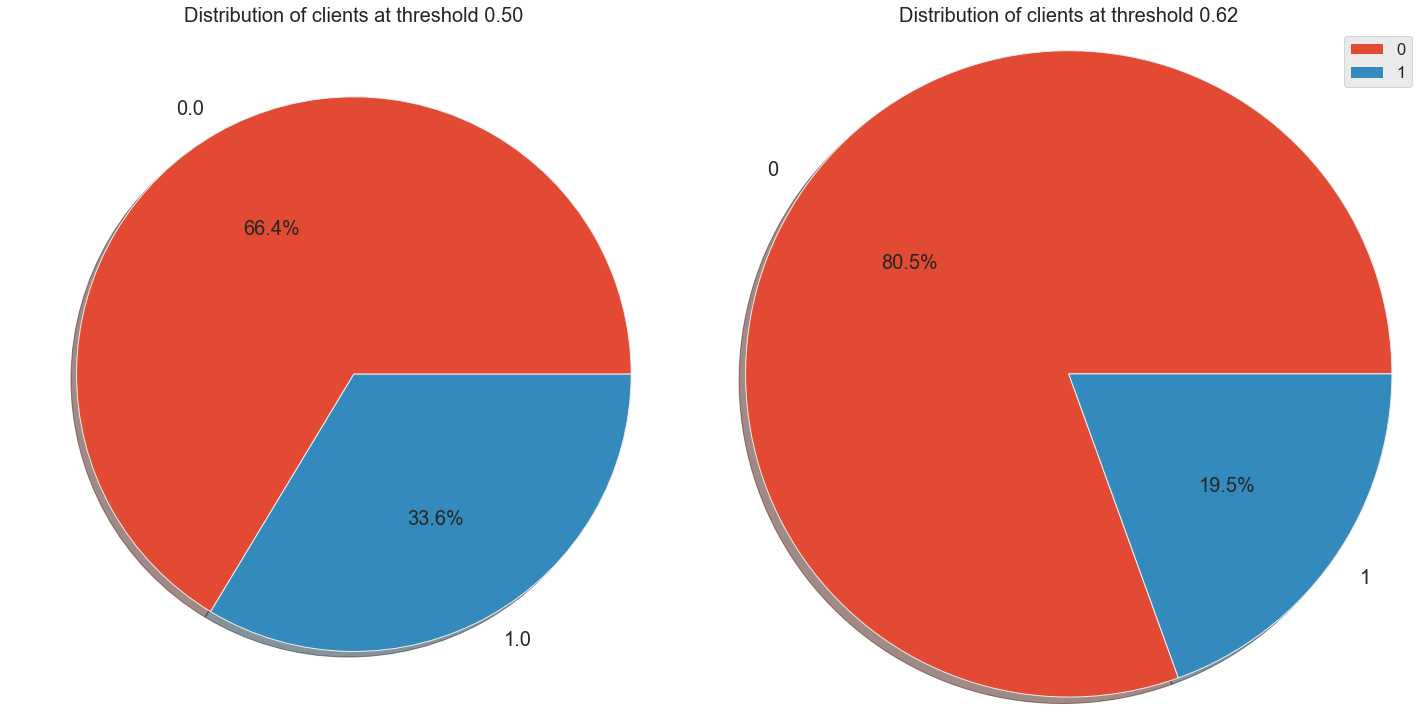

time: 406 ms (started: 2021-12-31 16:17:57 +01:00)


In [141]:
test_train_col_category(predictive_class_50, predictive_class_54, 'probability_default_payment', (20,20), seuil)

In [142]:
accuracy = accuracy_score(y_test, prediction)
print(colored('L\'accuracy score est de {} .\n \n '.format(
        accuracy), 'blue'))

precision = precision_score(y_test, prediction, average='binary')
print(colored('Le score de précision est de {}.\n \n '.format(
        precision), 'blue'))

recall = recall_score(y_test, prediction, average='binary')
print(colored('Le score recall est de {}.\n \n '.format(
        recall), 'blue'))

AUC = roc_auc_score(y_test, probability_default_payment)       
print(colored('Le score AUC est de {}.\n \n '.format(
        AUC), 'blue'))

f1 = f1_score(y_test, prediction, average='binary')
print(colored('Le score f1 est de {}.\n \n '.format(
        f1), 'blue'))

L'accuracy score est de 0.8080550352044441 .
 
 
Le score de précision est de 0.18409279204639603.
 
 
Le score recall est de 0.5215962441314554.
 
 
Le score AUC est de 0.7543548867195031.
 
 
Le score f1 est de 0.27213717085119415.
 
 
time: 94 ms (started: 2021-12-31 16:18:06 +01:00)


In [143]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),23908 (TN),4924 (FP)
Real Positive (1),1019 (FN),1111 (TP)


time: 31 ms (started: 2021-12-31 16:18:13 +01:00)


In [144]:
roc_auc = roc_auc_score(y_test, probability_default_payment) 
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7544
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89     28832
         1.0       0.18      0.52      0.27      2130

    accuracy                           0.81     30962
   macro avg       0.57      0.68      0.58     30962
weighted avg       0.91      0.81      0.85     30962

time: 63 ms (started: 2021-12-31 16:18:17 +01:00)


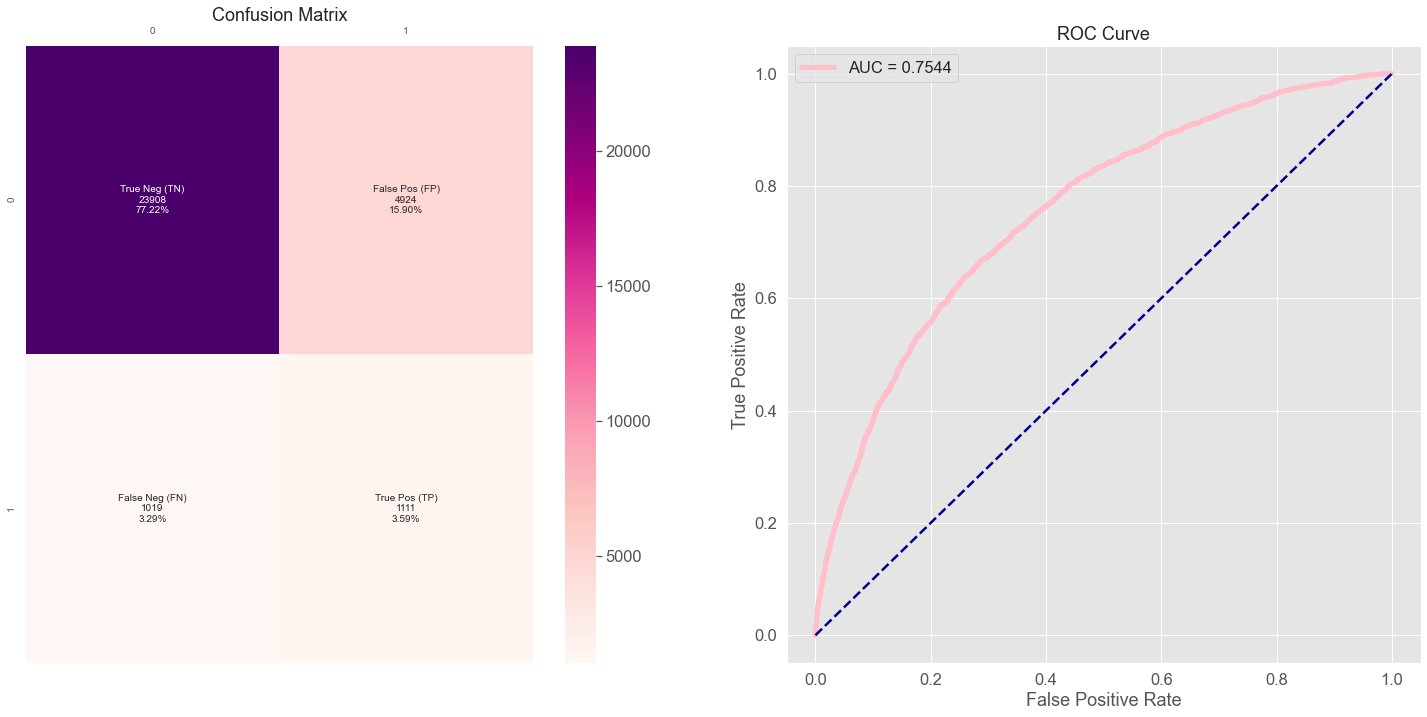

True negative =  23908
False positive =  4924
False negative =  1019
True positive =  1111
time: 422 ms (started: 2021-12-31 16:18:22 +01:00)


In [145]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [146]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.7056240474429974

time: 0 ns (started: 2021-12-31 16:18:26 +01:00)


In [147]:
comparison_thresh = comparison_thresh.append(
    pd.DataFrame(
        {
         "Modele": "Après détermination du seuil optimal (0,50)",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain
        },
        index=[1],
    )
)
comparison_thresh

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain
0,"Avant de déterminer le seuil optimal (0,50)",0.689070,0.754355,0.684977,0.232603,1459,0.140086,671,0.687607
1,"Après détermination du seuil optimal (0,50)",0.808055,0.754355,0.521596,0.272137,1111,0.184093,1019,0.705624


time: 15 ms (started: 2021-12-31 16:18:29 +01:00)


In [148]:
comparison_percentage = pd.concat([X_test, y_test], axis=1)
comparison_percentage['PREDICTION'] = prediction

time: 31 ms (started: 2021-12-31 16:18:33 +01:00)


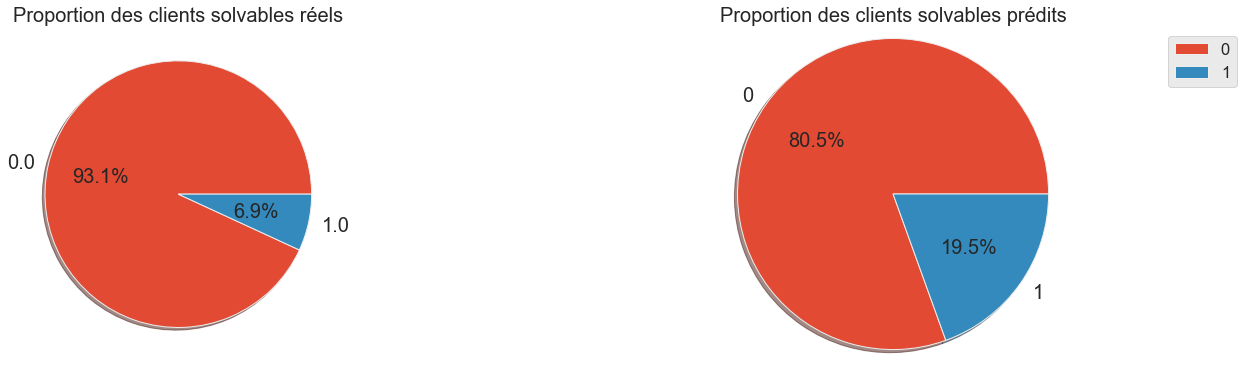

time: 312 ms (started: 2021-12-31 16:18:39 +01:00)


In [149]:
values_train = comparison_percentage["TARGET"].value_counts()
labels_train = comparison_percentage["TARGET"].value_counts().index
values_test = comparison_percentage["PREDICTION"].value_counts()
labels_test = comparison_percentage["PREDICTION"].value_counts().index
    
plt.figure(figsize=(20,10))
    
#pie plot
plt.subplot(2, 2, 1)
plt.title("Proportion des clients solvables réels", fontsize=20)
plt.pie(values_train, labels=labels_train,
            autopct='%.1f%%', shadow=True, textprops={'fontsize': 20})
    
    
# Pie Plot
plt.subplot(2, 2, 2)
plt.title("Proportion des clients solvables prédits", fontsize=20)
plt.pie(values_test, labels=labels_test,
            autopct='%.1f%%', shadow=True, textprops={'fontsize': 20})
plt.axis('equal')
plt.tight_layout()
plt.legend()
plt.show()

il y a plus de personnes catégorisées comme personnes ne pouvant pas payer leur prêt comparé à la réalité. Le fait qu'il y ait plus de personnes prédites comme des non payeur n'est pas grave car la banque ne perd pas d'argent.

## <font color='blue'>Importance des features </font>

### <font color='grey'>Features importance simple</font>

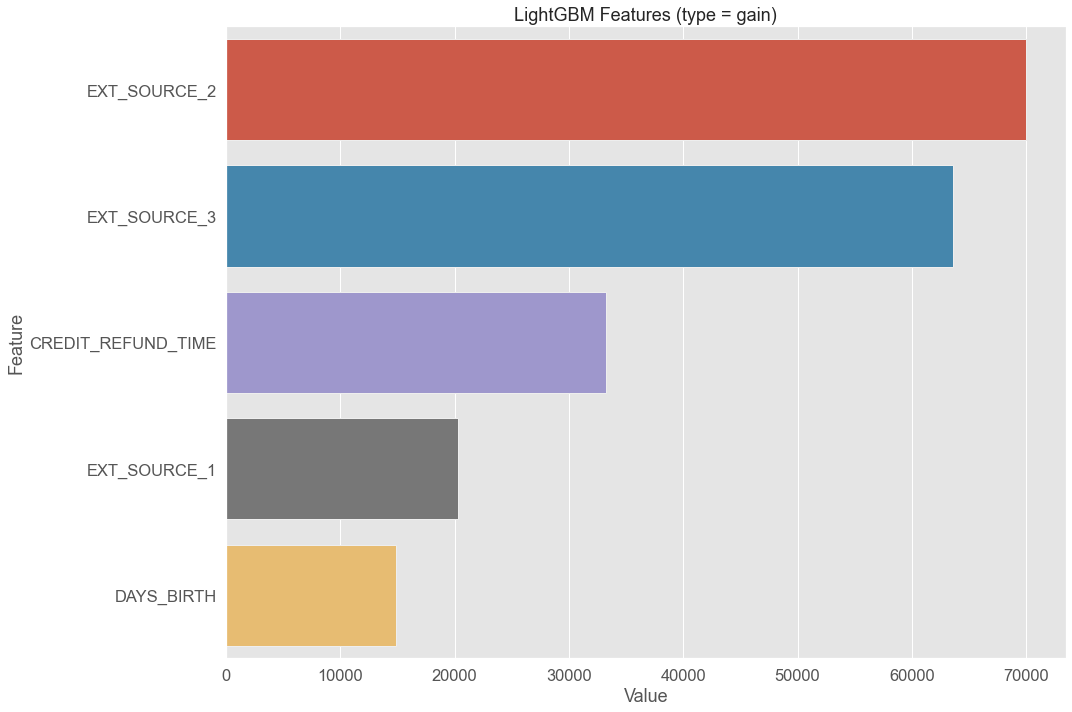

time: 219 ms (started: 2021-12-31 16:18:50 +01:00)


In [150]:
feature_imp = pd.DataFrame(sorted(zip(best_model.booster_.feature_importance(importance_type='gain'),X_train_undersampled.columns)), columns=['Value','Feature'])

plt.figure(figsize=(15, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(5))
plt.title('LightGBM Features (type = gain)')
plt.tight_layout()
plt.show()

Avec cette représentation, on peut dire que les features les plus importantes pour la prédiction d'accord d'un prêt sont les sources extérieures 2 et 3 qui sont les scores normalisés créés à partir d'une source de données externe. Ces scores pourraient regrouper différentes caractéristiques sur le paiement d'un crédit tel que le retard de paiement par exemple. Plus ces scores sont élevés et plus le client risque de ne pas voir sa demande de prêt accepté.
Puis on trouve la durée que met un client à rembourser un prêt. Plus le temps de remboursement des crédits est grand plus il y a de chance que le prêt ne lui soit pas accordé. Puis il y a la source externe 1. 
Le nombre de jours depuis la naissance des clients donc leur âge joue un rôle important dans l'acceptation d'un crédit. Comme nous l'avons vu lors du préprocessing, les clients jeunes ont plus de mal à rembourser leur prêt. 

### <font color='grey'>Features importance SHAP</font>

Les valeurs de Shapley calculent l’importance d’une variable en comparant la sortie qu’un modèle peut prédire avec et sans cette variable. Cependant, étant donné que l’ordre dans lequel un modèle voit les variables peut affecter ses prédictions, cela se fait dans tous les ordres possibles, afin que les fonctionnalités soient comparées équitablement. Cette approche est inspirée de la théorie des jeux.

SHAP s’utilise pour expliquer un modèle existant. Prenant un cas de classification binaire construite avec un modèle sklearn. On entraine, tune et teste notre modèle. Ensuite on peut utiliser nos données et le modèle pour créer un modèle supplémentaire de SHAP qui explique notre modèle de classification.

Les valeurs Shap sont des tableaux d'une longueur correspondant au nombre de classes dans la cible. Ici, le problème est la classification binaire, et donc les valeurs Shap ont deux tableaux correspondant à l'une ou l'autre classe.

Les valeurs Shap sont des nombres à virgule flottante correspondant aux données de chaque ligne correspondant à chaque caractéristique. La valeur Shap représente la contribution de ce point de données particulier dans la prédiction des sorties. Si la valeur shap est très proche de zéro, on peut dire que le point de données contribue très peu aux prédictions. Si la valeur shap est une valeur fortement positive ou fortement négative, nous pouvons dire que le point de données contribue grandement à la prédiction de la classe positive ou négative.



In [153]:
pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4
Note: you may need to restart the kernel to use updated packages.
time: 7.74 s (started: 2021-12-31 16:21:01 +01:00)


In [154]:
import shap
# explain 10000 examples from the test set
# each row is an explanation for a sample, and the last column in the base rate of the model
shap_values = shap.TreeExplainer(best_model.booster_).shap_values(X_test.iloc[:10000,:])

time: 47.5 s (started: 2021-12-31 16:21:26 +01:00)


In [155]:
# compute the global importance of each feature as the mean absolute value
# of the feature's importance over all the samples
global_importances = np.abs(shap_values).mean(0)[:-1]

time: 31 ms (started: 2021-12-31 16:22:32 +01:00)


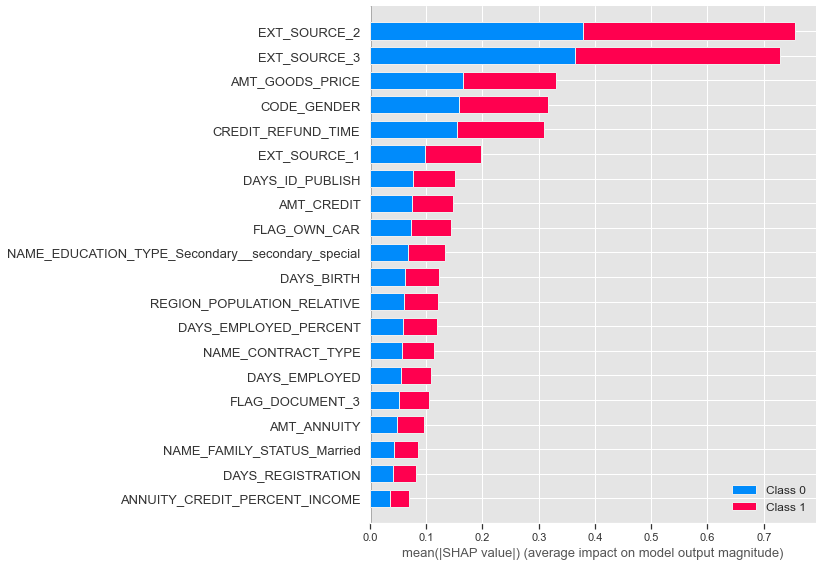

time: 484 ms (started: 2021-12-31 16:22:36 +01:00)


In [156]:
shap.summary_plot(shap_values, X_test.iloc[:10000,:])

Avec ce graphique, nous pouvons voir que nous retrouvons les EXT_SOURCES 1, 2 et 3 ainsi que CREDIT_REFUND_TIME. Un peu plus bas nous retrouvons DAYS_BIRTHS même si il semble jouer un rôle moins important pour le fait qu'une personne soit non solvable. Dans cette nouvelle représentation, le Genre du client est important dans la prédiction mais nous ne le prendrons pas en compte car cette information ferait de notre modèle un modèle discriminant. Nous trouvons également un rôle important pour la variable AMT_GOODS_PRICE qui correspond au montant du prix des biens pour lesquels le prêt est accordé pour les prêts de consommation qui ne sera pas pris en compte car le choix peut être biaisé et le crédit ne pourrait pas être accordé si le biens est trop cher.

Nous prendrons donc en comte les features EXT_SOURCES 1, 2, 3 ainsi que CREDIT_REFUND_TIME et l'âge.

Voyons plus en détail l'influence de chacune de ces variables sur la prédiction de non solvabilité.

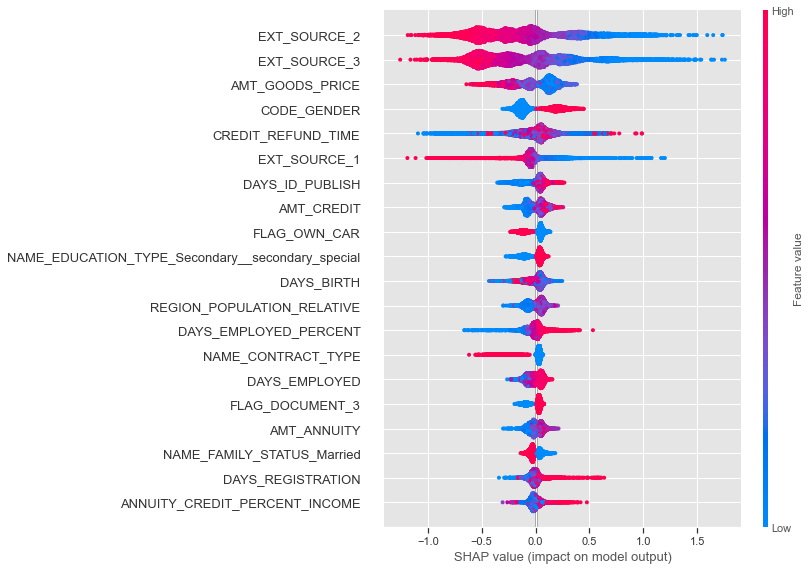

time: 1.64 s (started: 2021-12-31 16:23:48 +01:00)


In [157]:
shap.summary_plot(shap_values[1], X_test.astype("float").iloc[:10000,:])
#shap.summary_plot(shap_values[1], X_test.astype("float"))

Nous traçons les valeurs SHAP de chaque caractéristique pour chaque échantillon sur l'axe des x, puis nous les laissons s'accumuler. Si nous colorons ensuite chaque point selon sa valeur, nous pouvons voir comment une valeur faible ou élevée affecte la sortie du modèle. 

Pour EXT_SOURCE_2, EXT_SOURCE_3, EXT_SOURCE_1 on peut voir que de faibles valeurs augmentent de manière significative la sortie de probabilité du modèle et donc le fait d'être non solvable.

Au contraire, pour CREDIT_REFUND_TIME, plus le temps de remboursement des crédits est grand plus il a de chance que le prêt ne lui soit pas accordé.